In [211]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.dummy import DummyRegressor
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor


In [212]:
def RoundPredictions(pred):

    for i, label in enumerate(pred):
        if pred[i] <4:
            pred[i]=np.floor(pred[i])
        elif pred[i]>=4 and pred[i]<=6:
            pred[i] = np.rint(pred[i])
        else:
            pred[i]=np.ceil(pred[i])

In [213]:
train_df=pd.read_csv("C:\\Users\\Ivona\\Desktop\\Arousal\\Arousal classification\\TRAIN.csv")
train_df

,ID,mean_hr,ibi,sdnn,median_ibi,sdsd,rmssd,pnn20,pnn50,median_diff,...,Cd,Ca,SDNNd,SDNNa,samp_ent,sqi_sdnn,IMU_filter_quality,video,arousal,valence
0,1.0,83.333333,720.000000,65.319726,720,60.514873,60.524027,76.315789,23.684211,0,...,0.411577,0.588423,42.918140,51.316902,1.540445,1.0,1,GroupA\01,7.0,3.0
1,1.0,84.151473,713.000000,60.588778,700,47.534893,47.931575,71.794872,15.384615,0,...,0.241666,0.758334,28.158470,49.880580,1.299283,1.0,1,GroupA\01,7.0,3.0
2,1.0,87.988827,681.904762,107.597975,680,155.535574,155.547812,65.853659,14.634146,0,...,0.498345,0.501655,77.704576,77.962147,1.347074,1.0,1,GroupA\01,7.0,3.0
3,1.0,92.847318,646.222222,108.305922,640,148.075813,148.078603,47.727273,9.090909,0,...,0.498938,0.501062,78.179529,78.345817,1.046787,1.0,1,NaN,NaN,NaN
4,1.0,94.903339,632.222222,118.441526,600,164.507924,164.507924,45.714286,5.714286,0,...,0.500000,0.500000,86.173559,86.173559,0.856187,1.0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062,9.0,72.072072,832.500000,81.509202,840,97.177654,97.186220,67.741935,16.129032,0,...,0.498658,0.501342,59.367460,59.526983,0.864997,1.0,1,GroupB\09,6.0,8.0
2063,9.0,69.093611,868.387097,80.766361,880,96.526335,96.609178,70.000000,13.333333,0,...,0.516939,0.483061,59.347086,57.369475,1.791759,1.0,1,GroupB\09,6.0,8.0
2064,9.0,70.454545,851.612903,73.401098,880,70.414645,70.427267,66.666667,16.666667,0,...,0.491474,0.508526,52.751859,53.659206,2.079442,1.0,1,GroupB\09,6.0,8.0
2065,9.0,69.444444,864.000000,74.188948,880,77.438173,77.548650,72.413793,34.482759,0,...,0.505367,0.494633,53.768467,53.194375,1.897120,1.0,1,NaN,NaN,8.0


In [214]:
del train_df['video']
del train_df['valence']
del train_df['ID']
train_df.dropna(axis=0, inplace=True, subset=['arousal'])
train_df

,mean_hr,ibi,sdnn,median_ibi,sdsd,rmssd,pnn20,pnn50,median_diff,rr_range,...,SD2d,SD2a,Cd,Ca,SDNNd,SDNNa,samp_ent,sqi_sdnn,IMU_filter_quality,arousal
0,83.333333,720.000000,65.319726,720,60.514873,60.524027,76.315789,23.684211,0,320,...,51.440215,66.510192,0.411577,0.588423,42.918140,51.316902,1.540445,1.0,1,7.0
1,84.151473,713.000000,60.588778,700,47.534893,47.931575,71.794872,15.384615,0,280,...,34.435430,64.785779,0.241666,0.758334,28.158470,49.880580,1.299283,1.0,1,7.0
2,87.988827,681.904762,107.597975,680,155.535574,155.547812,65.853659,14.634146,0,720,...,77.045457,76.786670,0.498345,0.501655,77.704576,77.962147,1.347074,1.0,1,7.0
8,85.774059,699.512195,51.605975,720,40.938979,40.987803,67.500000,12.500000,0,200,...,48.336693,46.187744,0.526746,0.473254,37.471528,35.517962,1.167605,1.0,1,8.0
9,86.741890,691.707317,36.686040,680,35.199432,35.213634,62.500000,5.000000,0,160,...,32.909258,32.965503,0.495684,0.504316,26.369599,26.598209,1.037988,1.0,1,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,66.298343,905.000000,47.696960,920,43.528072,43.699856,61.290323,19.354839,0,200,...,46.101729,37.643010,0.587036,0.412964,36.460271,30.580464,0.897942,1.0,1,2.0
2059,65.217391,920.000000,39.349550,920,43.817805,43.817805,63.333333,13.333333,0,160,...,34.866796,31.424909,0.518431,0.481569,28.784308,27.742107,0.838329,1.0,1,2.0
2062,72.072072,832.500000,81.509202,840,97.177654,97.186220,67.741935,16.129032,0,440,...,66.400231,69.619849,0.498658,0.501342,59.367460,59.526983,0.864997,1.0,1,6.0
2063,69.093611,868.387097,80.766361,880,96.526335,96.609178,70.000000,13.333333,0,440,...,65.674339,66.977322,0.516939,0.483061,59.347086,57.369475,1.791759,1.0,1,6.0


In [215]:
validation_df=pd.read_csv('C:\\Users\\Ivona\\Desktop\\Arousal\\Arousal classification\\VALIDATION.csv')
validation_df

,ID,mean_hr,ibi,sdnn,median_ibi,sdsd,rmssd,pnn20,pnn50,median_diff,...,Cd,Ca,SDNNd,SDNNa,samp_ent,sqi_sdnn,IMU_filter_quality,video,arousal,valence
0,12,116.417910,515.384615,68.232113,520,89.439280,89.442719,52.941176,9.803922,0,...,0.505366,0.494634,49.400621,48.873288,0.884815,1.000000,1,NaN,NaN,NaN
1,12,104.529617,574.000000,190.063147,520,211.366675,211.369163,56.410256,17.948718,0,...,0.305641,0.694359,107.581059,162.151942,0.957113,0.773270,1,NaN,NaN,NaN
2,12,98.056537,611.891892,244.969252,520,294.081537,294.089933,55.555556,25.000000,0,...,0.357307,0.642693,150.207499,201.452486,0.310891,0.462540,1,NaN,NaN,NaN
3,12,101.739130,589.743590,235.115762,520,235.697821,236.732138,44.736842,21.052632,0,...,0.231213,0.768787,107.624632,196.249717,0.152151,0.518304,1,GroupB\07,7.0,7.0
4,12,114.245416,525.185185,91.423733,520,115.941823,116.295006,50.943396,15.094340,0,...,0.365836,0.634164,49.980909,65.805438,0.764099,1.000000,1,GroupB\07,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,6,74.175824,808.888889,182.601232,780,248.202682,248.331576,88.571429,48.571429,40,...,0.470135,0.529865,119.867073,127.253941,1.431100,0.815500,1,GroupA\04,5.0,6.0
485,6,76.056338,788.888889,116.851705,760,138.818337,138.893587,94.285714,45.714286,40,...,0.533749,0.466251,86.830823,81.154929,1.466337,1.000000,1,GroupA\04,5.0,6.0
486,6,76.704545,782.222222,139.982362,780,173.300259,173.304027,85.714286,51.428571,0,...,0.525531,0.474469,103.328821,98.180738,1.431100,1.000000,1,NaN,NaN,NaN
487,6,80.168776,748.421053,141.542746,720,199.675412,199.675412,83.783784,48.648649,-40,...,0.473101,0.526899,99.227926,104.717862,1.431100,1.000000,1,GroupA\05,3.0,4.0


In [216]:
del validation_df['video']
del validation_df['valence']
del validation_df['ID']
validation_df.dropna(axis=0, inplace=True, subset=['arousal'])
validation_df

,mean_hr,ibi,sdnn,median_ibi,sdsd,rmssd,pnn20,pnn50,median_diff,rr_range,...,SD2d,SD2a,Cd,Ca,SDNNd,SDNNa,samp_ent,sqi_sdnn,IMU_filter_quality,arousal
3,101.739130,589.743590,235.115762,520,235.697821,236.732138,44.736842,21.052632,0,880,...,105.976354,245.325620,0.231213,0.768787,107.624632,196.249717,0.152151,0.518304,1,7.0
4,114.245416,525.185185,91.423733,520,115.941823,116.295006,50.943396,15.094340,0,520,...,50.038734,65.274125,0.365836,0.634164,49.980909,65.805438,0.764099,1.000000,1,7.0
5,117.318436,511.428571,33.563829,520,31.416162,31.449816,45.454545,5.454545,0,160,...,30.011282,29.497412,0.493695,0.506305,23.694929,23.995612,0.677061,1.000000,1,7.0
8,106.656581,562.553192,160.722678,520,200.107721,200.260700,84.782609,34.782609,0,600,...,127.711326,119.506881,0.514109,0.485891,114.598731,111.409418,1.280934,0.939317,1,9.0
9,106.174699,565.106383,121.722956,520,152.481676,152.543650,71.739130,28.260870,0,560,...,81.464411,109.387729,0.435067,0.564933,81.448025,92.811361,1.098612,1.000000,1,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,82.191781,730.000000,165.563013,720,266.694965,266.704759,85.714286,48.571429,0,1080,...,119.023639,83.805067,0.505616,0.494384,120.883105,119.532904,1.431100,0.911924,1,5.0
484,74.175824,808.888889,182.601232,780,248.202682,248.331576,88.571429,48.571429,40,960,...,128.913085,112.976110,0.470135,0.529865,119.867073,127.253941,1.431100,0.815500,1,5.0
485,76.056338,788.888889,116.851705,760,138.818337,138.893587,94.285714,45.714286,40,480,...,101.386309,89.681844,0.533749,0.466251,86.830823,81.154929,1.466337,1.000000,1,5.0
487,80.168776,748.421053,141.542746,720,199.675412,199.675412,83.783784,48.648649,-40,640,...,91.670463,112.834664,0.473101,0.526899,99.227926,104.717862,1.431100,1.000000,1,3.0


In [217]:
test_df=pd.read_csv("C:\\Users\\Ivona\\Desktop\\Arousal\\Arousal classification\\TEST.csv")
test_df

,ID,mean_hr,ibi,sdnn,median_ibi,sdsd,rmssd,pnn20,pnn50,median_diff,...,Cd,Ca,SDNNd,SDNNa,samp_ent,sqi_sdnn,IMU_filter_quality,video,arousal,valence
0,13,86.558761,693.170732,51.817646,680,53.383050,53.385391,72.500000,22.500000,0,...,0.514255,0.485745,38.032554,36.963242,1.634131,1.000000,1,GroupD\16,5.0,2.0
1,13,84.985836,706.000000,67.852782,720,54.638854,54.725422,74.358974,15.384615,0,...,0.542650,0.457350,50.611404,46.463573,1.871802,1.000000,1,NaN,NaN,NaN
2,13,84.269663,712.000000,68.234888,720,53.589130,53.589130,74.358974,12.820513,0,...,0.520441,0.479559,50.183097,48.171809,1.268511,1.000000,1,NaN,NaN,NaN
3,13,84.745763,708.000000,61.449166,720,41.459247,41.509962,64.102564,10.256410,0,...,0.511279,0.488721,44.123273,43.138893,1.299283,1.000000,1,GroupD\17,7.0,2.0
4,13,86.741890,691.707317,45.258199,680,49.759421,49.799598,62.500000,22.500000,0,...,0.493288,0.506712,32.252211,32.688114,1.386294,1.000000,1,GroupD\17,7.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,8,74.013158,810.666667,97.943294,800,146.817204,146.875504,82.758621,51.724138,0,...,0.522517,0.477483,72.500476,69.305749,1.431100,1.000000,1,GroupD\20,2.0,1.0
480,8,73.991031,810.909091,58.484063,840,51.462972,51.478151,71.875000,31.250000,0,...,0.520288,0.479712,42.964800,41.255422,1.791759,1.000000,1,GroupD\20,2.0,1.0
481,8,71.629213,837.647059,52.190760,840,53.470897,53.484634,72.727273,30.303030,0,...,0.549933,0.450067,39.738947,35.950063,1.386294,1.000000,1,GroupD\20,2.0,1.0
482,8,70.454545,851.612903,167.622786,840,152.659389,153.362316,76.666667,33.333333,0,...,0.410649,0.589351,103.661880,124.185469,1.504077,0.900267,1,GroupD\20,2.0,1.0


In [218]:
del test_df['video']
del test_df['valence']
del test_df['ID']
test_df.dropna(axis=0, inplace=True, subset=['arousal'])
test_df

,mean_hr,ibi,sdnn,median_ibi,sdsd,rmssd,pnn20,pnn50,median_diff,rr_range,...,SD2d,SD2a,Cd,Ca,SDNNd,SDNNa,samp_ent,sqi_sdnn,IMU_filter_quality,arousal
0,86.558761,693.170732,51.817646,680,53.383050,53.385391,72.500000,22.500000,0,200,...,47.292072,43.902555,0.514255,0.485745,38.032554,36.963242,1.634131,1.000000,1,5.0
3,84.745763,708.000000,61.449166,720,41.459247,41.509962,64.102564,10.256410,0,240,...,58.210508,57.818515,0.511279,0.488721,44.123273,43.138893,1.299283,1.000000,1,7.0
4,86.741890,691.707317,45.258199,680,49.759421,49.799598,62.500000,22.500000,0,200,...,38.006747,38.744396,0.493288,0.506712,32.252211,32.688114,1.386294,1.000000,1,7.0
5,89.235127,672.380952,51.815126,680,63.060927,63.091107,60.975610,29.268293,0,240,...,40.278477,42.918929,0.472778,0.527222,36.071843,38.092220,1.763589,1.000000,1,7.0
8,81.818182,733.333333,51.507198,720,49.830738,49.841855,63.157895,26.315789,0,280,...,43.727463,48.794865,0.467610,0.532390,36.083119,38.501446,1.421386,1.000000,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,74.013158,810.666667,97.943294,800,146.817204,146.875504,82.758621,51.724138,0,560,...,76.707670,55.350851,0.522517,0.477483,72.500476,69.305749,1.431100,1.000000,1,2.0
480,73.991031,810.909091,58.484063,840,51.462972,51.478151,71.875000,31.250000,0,240,...,55.430977,51.532830,0.520288,0.479712,42.964800,41.255422,1.791759,1.000000,1,2.0
481,71.629213,837.647059,52.190760,840,53.470897,53.484634,72.727273,30.303030,0,240,...,50.083608,41.950138,0.549933,0.450067,39.738947,35.950063,1.386294,1.000000,1,2.0
482,70.454545,851.612903,167.622786,840,152.659389,153.362316,76.666667,33.333333,0,880,...,104.263518,171.170189,0.410649,0.589351,103.661880,124.185469,1.504077,0.900267,1,2.0


In [219]:
def get_percentage_cnt(df, col):   
    t1 = pd.DataFrame(df.groupby(col)[col].count().rename('cnt%'))
    t1.reset_index(inplace=True)
    t1['cnt%'] = round((t1['cnt%'] * 100) / t1['cnt%'].sum(),2)
    return t1

def myplot(x, y, df):
    ax = sns.barplot(x=x, y=y, data=df)
    for p in ax.patches:
        ax.annotate('{0:.1f}%'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))

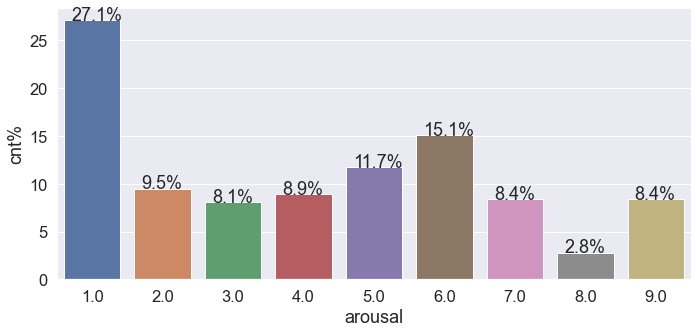

In [220]:
plt.figure(figsize=(25,5))

dual_categories = ['arousal']
plt_cnt = 1;
for feature in dual_categories:
    plt.subplot(1,2,plt_cnt)
    tempdf = get_percentage_cnt(validation_df, feature)
    myplot(feature, 'cnt%', tempdf)
    plt_cnt += 1

plt.show()

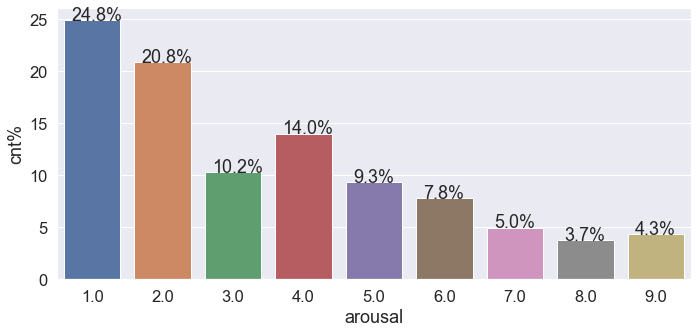

In [221]:
plt.figure(figsize=(25,5))

dual_categories = ['arousal']

plt_cnt = 1;
for feature in dual_categories:
    plt.subplot(1,2,plt_cnt)
    tempdf = get_percentage_cnt(test_df, feature)
    myplot(feature, 'cnt%', tempdf)
    plt_cnt += 1

plt.show()

In [222]:
train_x=train_df.drop(['arousal'], axis=1)
train_x

,mean_hr,ibi,sdnn,median_ibi,sdsd,rmssd,pnn20,pnn50,median_diff,rr_range,...,C2a,SD2d,SD2a,Cd,Ca,SDNNd,SDNNa,samp_ent,sqi_sdnn,IMU_filter_quality
0,83.333333,720.000000,65.319726,720,60.514873,60.524027,76.315789,23.684211,0,320,...,0.625713,51.440215,66.510192,0.411577,0.588423,42.918140,51.316902,1.540445,1.0,1
1,84.151473,713.000000,60.588778,700,47.534893,47.931575,71.794872,15.384615,0,280,...,0.779714,34.435430,64.785779,0.241666,0.758334,28.158470,49.880580,1.299283,1.0,1
2,87.988827,681.904762,107.597975,680,155.535574,155.547812,65.853659,14.634146,0,720,...,0.498318,77.045457,76.786670,0.498345,0.501655,77.704576,77.962147,1.347074,1.0,1
8,85.774059,699.512195,51.605975,720,40.938979,40.987803,67.500000,12.500000,0,200,...,0.477277,48.336693,46.187744,0.526746,0.473254,37.471528,35.517962,1.167605,1.0,1
9,86.741890,691.707317,36.686040,680,35.199432,35.213634,62.500000,5.000000,0,160,...,0.500854,32.909258,32.965503,0.495684,0.504316,26.369599,26.598209,1.037988,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,66.298343,905.000000,47.696960,920,43.528072,43.699856,61.290323,19.354839,0,200,...,0.400014,46.101729,37.643010,0.587036,0.412964,36.460271,30.580464,0.897942,1.0,1
2059,65.217391,920.000000,39.349550,920,43.817805,43.817805,63.333333,13.333333,0,160,...,0.448219,34.866796,31.424909,0.518431,0.481569,28.784308,27.742107,0.838329,1.0,1
2062,72.072072,832.500000,81.509202,840,97.177654,97.186220,67.741935,16.129032,0,440,...,0.523657,66.400231,69.619849,0.498658,0.501342,59.367460,59.526983,0.864997,1.0,1
2063,69.093611,868.387097,80.766361,880,96.526335,96.609178,70.000000,13.333333,0,440,...,0.509822,65.674339,66.977322,0.516939,0.483061,59.347086,57.369475,1.791759,1.0,1


In [223]:
validation_x=validation_df.drop(['arousal'], axis=1)
validation_x

,mean_hr,ibi,sdnn,median_ibi,sdsd,rmssd,pnn20,pnn50,median_diff,rr_range,...,C2a,SD2d,SD2a,Cd,Ca,SDNNd,SDNNa,samp_ent,sqi_sdnn,IMU_filter_quality
3,101.739130,589.743590,235.115762,520,235.697821,236.732138,44.736842,21.052632,0,880,...,0.842738,105.976354,245.325620,0.231213,0.768787,107.624632,196.249717,0.152151,0.518304,1
4,114.245416,525.185185,91.423733,520,115.941823,116.295006,50.943396,15.094340,0,520,...,0.629855,50.038734,65.274125,0.365836,0.634164,49.980909,65.805438,0.764099,1.000000,1
5,117.318436,511.428571,33.563829,520,31.416162,31.449816,45.454545,5.454545,0,160,...,0.491365,30.011282,29.497412,0.493695,0.506305,23.694929,23.995612,0.677061,1.000000,1
8,106.656581,562.553192,160.722678,520,200.107721,200.260700,84.782609,34.782609,0,600,...,0.466849,127.711326,119.506881,0.514109,0.485891,114.598731,111.409418,1.280934,0.939317,1
9,106.174699,565.106383,121.722956,520,152.481676,152.543650,71.739130,28.260870,0,560,...,0.643242,81.464411,109.387729,0.435067,0.564933,81.448025,92.811361,1.098612,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,82.191781,730.000000,165.563013,720,266.694965,266.704759,85.714286,48.571429,0,1080,...,0.331445,119.023639,83.805067,0.505616,0.494384,120.883105,119.532904,1.431100,0.911924,1
484,74.175824,808.888889,182.601232,780,248.202682,248.331576,88.571429,48.571429,40,960,...,0.434399,128.913085,112.976110,0.470135,0.529865,119.867073,127.253941,1.431100,0.815500,1
485,76.056338,788.888889,116.851705,760,138.818337,138.893587,94.285714,45.714286,40,480,...,0.438971,101.386309,89.681844,0.533749,0.466251,86.830823,81.154929,1.466337,1.000000,1
487,80.168776,748.421053,141.542746,720,199.675412,199.675412,83.783784,48.648649,-40,640,...,0.602393,91.670463,112.834664,0.473101,0.526899,99.227926,104.717862,1.431100,1.000000,1


In [224]:
test_x=test_df.drop(['arousal'], axis=1)
test_x

,mean_hr,ibi,sdnn,median_ibi,sdsd,rmssd,pnn20,pnn50,median_diff,rr_range,...,C2a,SD2d,SD2a,Cd,Ca,SDNNd,SDNNa,samp_ent,sqi_sdnn,IMU_filter_quality
0,86.558761,693.170732,51.817646,680,53.383050,53.385391,72.500000,22.500000,0,200,...,0.462883,47.292072,43.902555,0.514255,0.485745,38.032554,36.963242,1.634131,1.000000,1
3,84.745763,708.000000,61.449166,720,41.459247,41.509962,64.102564,10.256410,0,240,...,0.496622,58.210508,57.818515,0.511279,0.488721,44.123273,43.138893,1.299283,1.000000,1
4,86.741890,691.707317,45.258199,680,49.759421,49.799598,62.500000,22.500000,0,200,...,0.509610,38.006747,38.744396,0.493288,0.506712,32.252211,32.688114,1.386294,1.000000,1
5,89.235127,672.380952,51.815126,680,63.060927,63.091107,60.975610,29.268293,0,240,...,0.531705,40.278477,42.918929,0.472778,0.527222,36.071843,38.092220,1.763589,1.000000,1
8,81.818182,733.333333,51.507198,720,49.830738,49.841855,63.157895,26.315789,0,280,...,0.554606,43.727463,48.794865,0.467610,0.532390,36.083119,38.501446,1.421386,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,74.013158,810.666667,97.943294,800,146.817204,146.875504,82.758621,51.724138,0,560,...,0.342400,76.707670,55.350851,0.522517,0.477483,72.500476,69.305749,1.431100,1.000000,1
480,73.991031,810.909091,58.484063,840,51.462972,51.478151,71.875000,31.250000,0,240,...,0.463605,55.430977,51.532830,0.520288,0.479712,42.964800,41.255422,1.791759,1.000000,1
481,71.629213,837.647059,52.190760,840,53.470897,53.484634,72.727273,30.303030,0,240,...,0.412310,50.083608,41.950138,0.549933,0.450067,39.738947,35.950063,1.386294,1.000000,1
482,70.454545,851.612903,167.622786,840,152.659389,153.362316,76.666667,33.333333,0,880,...,0.729379,104.263518,171.170189,0.410649,0.589351,103.661880,124.185469,1.504077,0.900267,1


In [225]:

train_y=train_df["arousal"]
train_y

0       7.0
1       7.0
2       7.0
8       8.0
9       8.0
       ... 
2058    2.0
2059    2.0
2062    6.0
2063    6.0
2064    6.0
Name: arousal, Length: 1509, dtype: float64

In [226]:
validation_y=validation_df["arousal"]
validation_y

3      7.0
4      7.0
5      7.0
8      9.0
9      9.0
      ... 
483    5.0
484    5.0
485    5.0
487    3.0
488    3.0
Name: arousal, Length: 358, dtype: float64

In [227]:
test_y=test_df["arousal"]
test_y

0      5.0
3      7.0
4      7.0
5      7.0
8      2.0
      ... 
479    2.0
480    2.0
481    2.0
482    2.0
483    2.0
Name: arousal, Length: 322, dtype: float64

In [228]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
print(scaler.fit(train_x))
print(scaler.transform(train_x))

StandardScaler()
[[ 0.59170417 -0.65291379 -0.63462537 ...  0.28763243  0.44956845
   0.22546764]
 [ 0.67529581 -0.7217529  -0.69280724 ... -0.22877571  0.44956845
   0.22546764]
 [ 1.06736929 -1.02754844 -0.11468152 ... -0.12644001  0.44956845
   0.22546764]
 ...
 [-0.5588912   0.45342918 -0.43552492 ... -1.15872543  0.44956845
   0.22546764]
 [-0.86320914  0.80634862 -0.44466049 ...  0.82578017  0.44956845
   0.22546764]
 [-0.72415853  0.64138852 -0.53523953 ...  1.44180312  0.44956845
   0.22546764]]


In [229]:
scaler=StandardScaler()
print(scaler.fit(validation_x))
print(scaler.transform(validation_x))

StandardScaler()
[[ 1.26412759 -1.24429953  0.95544842 ... -2.45593381 -0.97971945
   0.318651  ]
 [ 2.2065498  -1.84883912 -0.78296791 ... -1.15888846  0.66654548
   0.318651  ]
 [ 2.43811992 -1.97765918 -1.48296919 ... -1.34336823  0.66654548
   0.318651  ]
 ...
 [-0.67122193  0.62054235 -0.47533497 ...  0.32952948  0.66654548
   0.318651  ]
 [-0.3613255   0.24159233 -0.17661757 ...  0.25484423  0.66654548
   0.318651  ]
 [-0.11341442 -0.03467236  0.10303885 ...  2.48842277  0.38303288
   0.318651  ]]


In [230]:
scaler=StandardScaler()
print(scaler.fit(test_x))
print(scaler.transform(test_x))

StandardScaler()
[[ 1.65052655 -1.39388133 -1.13656318 ...  0.22090585  0.68572007
   0.05581456]
 [ 1.42559927 -1.2425556  -1.02892192 ... -0.50332862  0.68572007
   0.05581456]
 [ 1.67324615 -1.40881479 -1.20987114 ... -0.3151336   0.68572007
   0.05581456]
 ...
 [-0.20168795  0.08043186 -1.13239328 ... -0.3151336   0.68572007
   0.05581456]
 [-0.34742157  0.22294676  0.15766769 ... -0.06038324  0.36387188
   0.05581456]
 [-0.75563649  0.64868419  1.09351773 ... -1.69069987 -1.16544976
   0.05581456]]


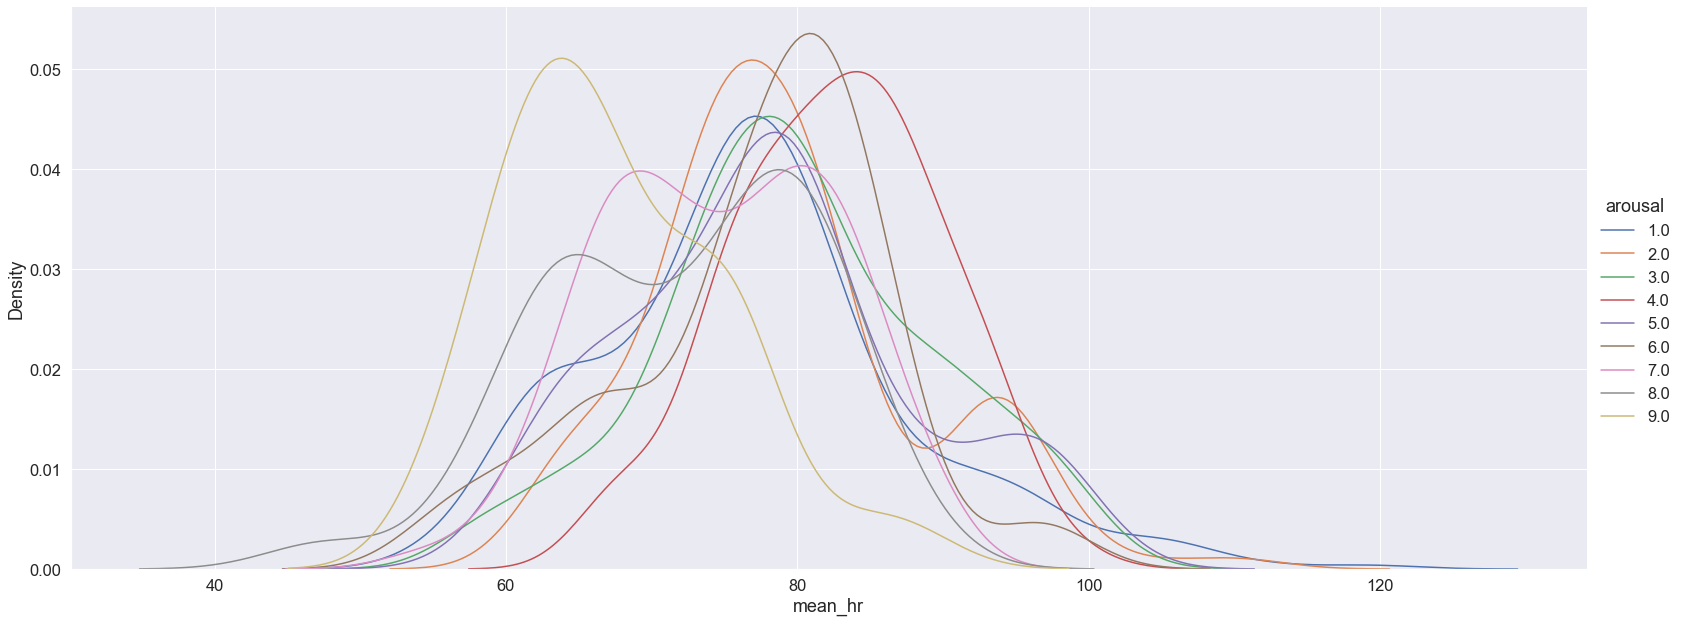

In [231]:
sns.FacetGrid(train_df, hue="arousal", height=9,aspect=2.5).map(sns.kdeplot, "mean_hr").add_legend()
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '7.0'),
  Text(7, 0, '8.0'),
  Text(8, 0, '9.0')])

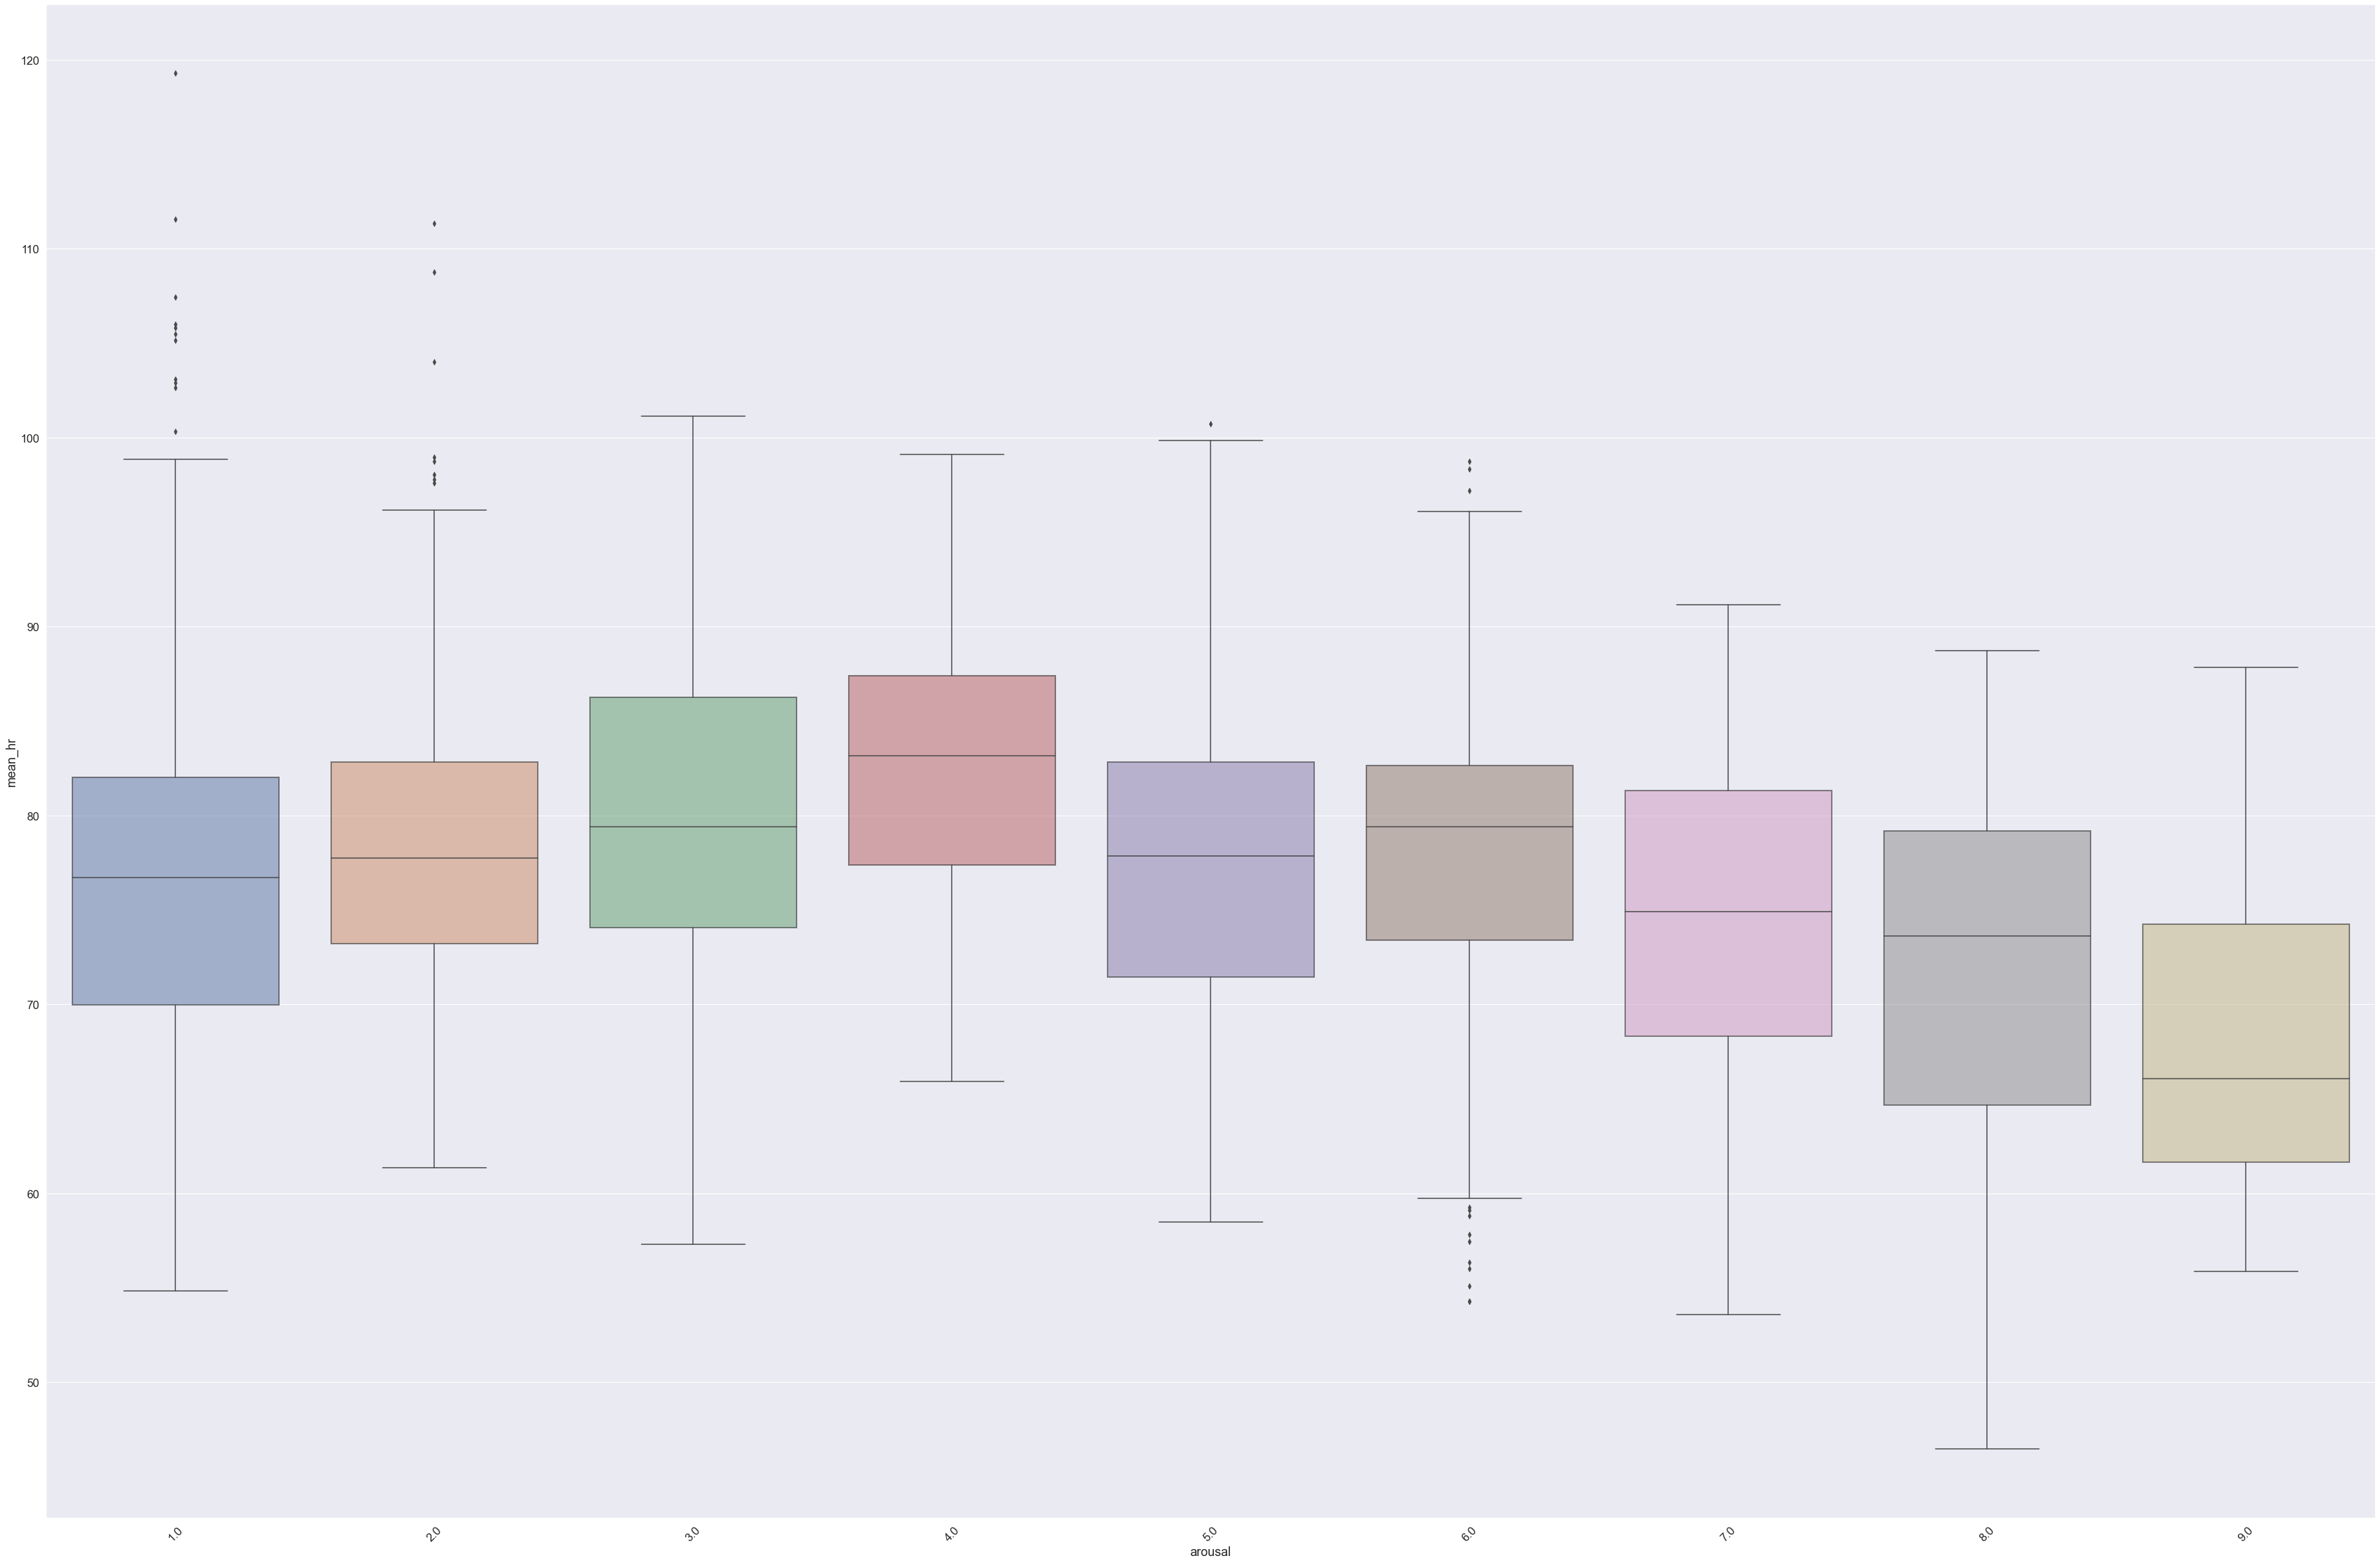

In [232]:
plt.figure(figsize = (60, 40))
ax = sns.boxplot(x='arousal', y='mean_hr', data=train_df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

In [233]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
dummy = DummyRegressor(strategy="mean")
dummy.fit(train_x, train_y)
arousal_y_pred_dummy = dummy.predict(test_x) 
arousal_y_pred_dummy

array([3.91451292, 3.91451292, 3.91451292, 3.91451292, 3.91451292,
       3.91451292, 3.91451292, 3.91451292, 3.91451292, 3.91451292,
       3.91451292, 3.91451292, 3.91451292, 3.91451292, 3.91451292,
       3.91451292, 3.91451292, 3.91451292, 3.91451292, 3.91451292,
       3.91451292, 3.91451292, 3.91451292, 3.91451292, 3.91451292,
       3.91451292, 3.91451292, 3.91451292, 3.91451292, 3.91451292,
       3.91451292, 3.91451292, 3.91451292, 3.91451292, 3.91451292,
       3.91451292, 3.91451292, 3.91451292, 3.91451292, 3.91451292,
       3.91451292, 3.91451292, 3.91451292, 3.91451292, 3.91451292,
       3.91451292, 3.91451292, 3.91451292, 3.91451292, 3.91451292,
       3.91451292, 3.91451292, 3.91451292, 3.91451292, 3.91451292,
       3.91451292, 3.91451292, 3.91451292, 3.91451292, 3.91451292,
       3.91451292, 3.91451292, 3.91451292, 3.91451292, 3.91451292,
       3.91451292, 3.91451292, 3.91451292, 3.91451292, 3.91451292,
       3.91451292, 3.91451292, 3.91451292, 3.91451292, 3.91451

In [234]:
train_x.describe()

,mean_hr,ibi,sdnn,median_ibi,sdsd,rmssd,pnn20,pnn50,median_diff,rr_range,...,C2a,SD2d,SD2a,Cd,Ca,SDNNd,SDNNa,samp_ent,sqi_sdnn,IMU_filter_quality
count,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,...,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000
mean,77.542127,786.392433,116.923085,768.588469,147.332172,147.457307,77.174310,42.389441,3.286945,543.485752,...,0.474401,91.021807,87.102728,0.499168,0.500832,83.483784,83.917567,1.406121,0.884217,0.951624
std,9.790579,101.720080,81.340060,108.439294,115.020141,115.072518,11.204224,20.412278,15.917908,379.559693,...,0.118109,63.183770,63.225132,0.060342,0.060342,58.714154,59.292571,0.467154,0.257628,0.214631
min,46.478873,502.962963,25.592968,480.000000,28.284271,28.284271,43.589744,0.000000,-80.000000,80.000000,...,0.058379,15.632330,14.950900,0.113605,0.134400,18.110319,18.122544,0.147636,0.000000,0.000000
25%,71.528752,722.424242,55.047289,720.000000,58.964537,59.083916,69.444444,27.027027,0.000000,240.000000,...,0.409151,45.782762,42.922473,0.473785,0.471185,39.404572,39.304015,1.098612,0.989874,1.000000
50%,77.622378,772.972973,88.215043,760.000000,103.163265,103.211586,77.777778,40.000000,0.000000,400.000000,...,0.478085,71.066632,66.200553,0.502171,0.497829,62.776680,62.720685,1.431100,1.000000,1.000000
75%,83.053691,838.823529,151.789328,840.000000,205.363458,205.542256,85.714286,56.756757,0.000000,760.000000,...,0.541661,116.593057,111.067493,0.528815,0.526215,109.694764,110.022013,1.609438,1.000000,1.000000
max,119.293078,1290.909091,441.507237,1240.000000,603.839567,603.876367,100.000000,96.153846,120.000000,1920.000000,...,0.929926,420.066972,420.415123,0.865600,0.886395,321.027835,337.489908,3.044522,1.000000,1.000000


In [235]:
# The mean absolute error
print ("Dummy Regressor performance:")
print('- Mean absolute error: %.2f'
      % mean_absolute_error(test_y, arousal_y_pred_dummy))

# The mean squared error
print('- Mean squared error: %.2f'
      % mean_squared_error(test_y, arousal_y_pred_dummy))

# The Root mean squared error
print('- Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(test_y, arousal_y_pred_dummy)))

# The coefficient of determination: 1 is perfect prediction
print('- Coefficient of determination (R2 score): %.2f'
      % r2_score(test_y, arousal_y_pred_dummy))

Dummy Regressor performance:
- Mean absolute error: 2.02
- Mean squared error: 5.63
- Root mean squared error: 2.37
- Coefficient of determination (R2 score): -0.03


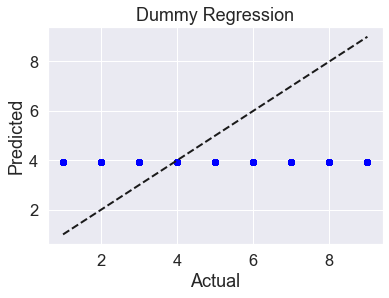

In [236]:

sns.set(font_scale=1.5)
plt.scatter(test_y, arousal_y_pred_dummy, color='blue')
plt.plot([test_y.min(), test_y.max()], [test_y.min(),test_y.max()], 'k--', lw=2)

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Dummy Regression")
plt.show()

In [237]:
dt = DecisionTreeRegressor(max_depth=2, max_features='sqrt',random_state=18)

dt = dt.fit(train_x, train_y)
dt_y = dt.predict(validation_x)

mae1 = mean_absolute_error(validation_y, dt_y)
mse1 = mean_squared_error(validation_y,dt_y)
rmse1 = np.sqrt(mean_squared_error(validation_y,dt_y))
r21 = r2_score(validation_y, dt_y)
# The mean absolute error
print ("Decision Tree Regressor performance:")
print('- Mean absolute error: %.2f' % mae1)

# The mean squared error
print('- Mean squared error: %.2f' % mse1)

# The Root mean squared error
print('- Root mean squared error: %.2f' % rmse1)

# The coefficient of determination: 1 is perfect prediction
print('- Coefficient of determination (R2 score): %.2f' % r21)




Decision Tree Regressor performance:
- Mean absolute error: 2.32
- Mean squared error: 7.30
- Root mean squared error: 2.70
- Coefficient of determination (R2 score): -0.06


In [238]:
dt = dt.fit(train_x, train_y)
dt_y = dt.predict(test_x)

mae1 = mean_absolute_error(test_y, dt_y)
mse1 = mean_squared_error(test_y,dt_y)
rmse1 = np.sqrt(mean_squared_error(test_y,dt_y))
r21 = r2_score(test_y, dt_y)
# The mean absolute error
print ("Decision Tree Regressor performance:")
print('- Mean absolute error: %.2f' % mae1)

# The mean squared error
print('- Mean squared error: %.2f' % mse1)

# The Root mean squared error
print('- Root mean squared error: %.2f' % rmse1)

# The coefficient of determination: 1 is perfect prediction
print('- Coefficient of determination (R2 score): %.2f' % r21)

Decision Tree Regressor performance:
- Mean absolute error: 1.99
- Mean squared error: 5.46
- Root mean squared error: 2.34
- Coefficient of determination (R2 score): -0.00


c:\Users\Ivona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actual Vs Predicted value')

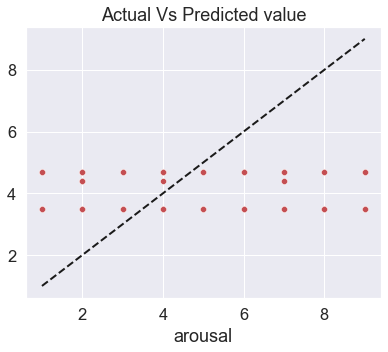

In [239]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(test_y,dt_y,ax=ax,color='r')
plt.plot([validation_y.min(), validation_y.max()], [validation_y.min(),validation_y.max()], 'k--', lw=2)
ax.set_title('Actual Vs Predicted value')


In [240]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor( max_depth=2, max_features='log2',min_samples_leaf=8, n_estimators=6, random_state=20)

rf.fit(train_x, train_y)

rf_y = rf.predict(validation_x)
RoundPredictions(rf_y)
mae2 = mean_absolute_error(validation_y, rf_y)
mse2 = mean_squared_error(validation_y,rf_y)
rmse2 = np.sqrt(mean_squared_error(validation_y,rf_y))
r22 = r2_score(validation_y, rf_y)
# The mean absolute error
print ("Random Forest Regressor performance:")
print('- Mean absolute error: %.2f' % mae2)

# The mean squared error
print('- Mean squared error: %.2f' % mse2)

# The Root mean squared error
print('- Root mean squared error: %.2f' % rmse2)

# The coefficient of determination: 1 is perfect prediction
print('- Coefficient of determination (R2 score): %.2f' % r22)


Random Forest Regressor performance:
- Mean absolute error: 2.45
- Mean squared error: 8.50
- Root mean squared error: 2.92
- Coefficient of determination (R2 score): -0.23


c:\Users\Ivona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actual Vs Predicted value')

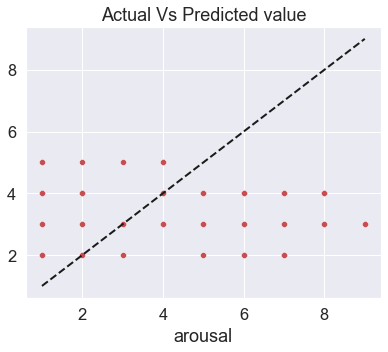

In [241]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(validation_y,rf_y,ax=ax,color='r')
plt.plot([validation_y.min(), validation_y.max()], [validation_y.min(),validation_y.max()], 'k--', lw=2)
ax.set_title('Actual Vs Predicted value')

In [242]:
rf.fit(train_x, train_y)

rf_y = rf.predict(test_x)
mae2 = mean_absolute_error(test_y, rf_y)
mse2 = mean_squared_error(test_y,rf_y)
rmse2 = np.sqrt(mean_squared_error(test_y,rf_y))
r22 = r2_score(test_y, rf_y)
# The mean absolute error
print ("Decision Tree Regressor performance:")
print('- Mean absolute error: %.2f' % mae2)

# The mean squared error
print('- Mean squared error: %.2f' % mse2)

# The Root mean squared error
print('- Root mean squared error: %.2f' % rmse2)

# The coefficient of determination: 1 is perfect prediction
print('- Coefficient of determination (R2 score): %.2f' % r22)

Decision Tree Regressor performance:
- Mean absolute error: 2.06
- Mean squared error: 5.78
- Root mean squared error: 2.40
- Coefficient of determination (R2 score): -0.06


c:\Users\Ivona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actual Vs Predicted value')

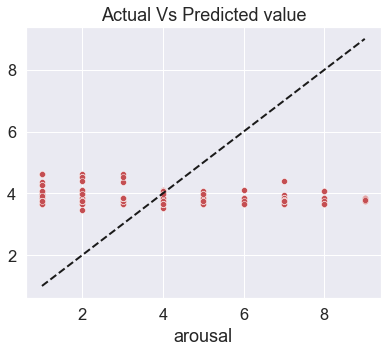

In [243]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(test_y,rf_y,ax=ax,color='r')
plt.plot([test_y.min(), test_y.max()], [test_y.min(),test_y.max()], 'k--', lw=2)
ax.set_title('Actual Vs Predicted value')

Do ovde e bez normalizacija

# Baseline normalisation

In [244]:
train_b=pd.read_csv('C:\\Users\\Ivona\\Desktop\\Arousal\\Arousal baseline\\TRAIN_.CSV')
train_b

,mean_hr,ibi,sdnn,median_ibi,sdsd,rmssd,pnn20,pnn50,median_diff,rr_range,...,Cd,Ca,SDNNd,SDNNa,samp_ent,sqi_sdnn,IMU_filter_quality,video,arousal,valence
0,7.426508,-71.236829,2.728227,-74.0,-1.405728,-1.489693,5.541998,-7.580625,0.0,68.0,...,-0.096568,0.096568,-2.192199,-46.372497,0.088632,0.0,0.0,GroupA\01,7.0,3.0
1,8.244648,-78.236829,-2.002721,-94.0,-14.385708,-14.082146,1.021080,-15.880220,0.0,28.0,...,-0.266478,0.266478,-16.951869,-61.132168,-0.152530,0.0,0.0,GroupA\01,7.0,3.0
2,12.082002,-109.332067,45.006476,-114.0,93.614972,93.534092,-4.920133,-16.630689,0.0,468.0,...,-0.009799,0.009799,32.594238,-11.586061,-0.104740,0.0,0.0,GroupA\01,7.0,3.0
3,16.940493,-145.014606,45.714423,-154.0,86.155211,86.064882,-23.046519,-22.173927,0.0,508.0,...,-0.009207,0.009207,33.069190,-11.111109,-0.405026,0.0,0.0,NaN,NaN,NaN
4,18.996514,-159.014606,55.850027,-194.0,102.587323,102.494203,-25.059506,-25.550550,0.0,508.0,...,-0.008144,0.008144,41.063221,-3.117078,-0.595627,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062,1.934312,-23.328654,42.702361,-12.0,58.509463,58.448869,10.924976,4.459922,0.0,276.0,...,-0.017641,0.017641,31.308100,4.453350,-0.236792,0.0,0.0,GroupB\09,6.0,8.0
2063,-1.044149,12.558443,41.959520,28.0,57.858145,57.871828,13.183040,1.664223,0.0,276.0,...,0.000639,-0.000639,31.287726,4.432976,0.689970,0.0,0.0,GroupB\09,6.0,8.0
2064,0.316786,-4.215751,34.594257,28.0,31.746455,31.689917,9.849707,4.997556,0.0,236.0,...,-0.024826,0.024826,24.692499,-2.162251,0.977652,0.0,0.0,GroupB\09,6.0,8.0
2065,-0.693315,8.171346,35.382107,28.0,38.769983,38.811300,15.596833,22.813648,0.0,236.0,...,-0.010933,0.010933,25.709107,-1.145643,0.795330,0.0,0.0,NaN,NaN,8.0


In [245]:
del train_b['video']
del train_b['valence']
train_b.dropna(axis=0, inplace=True, subset=['arousal'])
train_b

,mean_hr,ibi,sdnn,median_ibi,sdsd,rmssd,pnn20,pnn50,median_diff,rr_range,...,SD2d,SD2a,Cd,Ca,SDNNd,SDNNa,samp_ent,sqi_sdnn,IMU_filter_quality,arousal
0,7.426508,-71.236829,2.728227,-74.0,-1.405728,-1.489693,5.541998,-7.580625,0.0,68.0,...,-3.712754,12.782991,-0.096568,0.096568,-2.192199,-46.372497,0.088632,0.0,0.0,7.0
1,8.244648,-78.236829,-2.002721,-94.0,-14.385708,-14.082146,1.021080,-15.880220,0.0,28.0,...,-20.717539,11.058579,-0.266478,0.266478,-16.951869,-61.132168,-0.152530,0.0,0.0,7.0
2,12.082002,-109.332067,45.006476,-114.0,93.614972,93.534092,-4.920133,-16.630689,0.0,468.0,...,21.892488,23.059470,-0.009799,0.009799,32.594238,-11.586061,-0.104740,0.0,0.0,7.0
8,9.867234,-91.724633,-10.985524,-74.0,-20.981622,-21.025918,-3.273792,-18.764836,0.0,-52.0,...,-6.816276,-7.539456,0.018602,-0.018602,-7.638811,-51.819110,-0.284208,0.0,0.0,8.0
9,10.835065,-99.529511,-25.905459,-114.0,-26.721170,-26.800087,-8.273792,-26.264836,0.0,-92.0,...,-22.243711,-20.761698,-0.012460,0.012460,-18.740740,-62.921038,-0.413826,0.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,-3.839417,49.171346,8.890119,68.0,4.859881,4.962506,4.473363,7.685728,0.0,36.0,...,11.661081,5.729698,0.070736,-0.070736,8.400911,-18.453839,-0.203848,0.0,0.0,2.0
2059,-4.920368,64.171346,0.542709,68.0,5.149614,5.080454,6.516373,1.664223,0.0,-4.0,...,0.426149,-0.488402,0.002131,-0.002131,0.724948,-26.129802,-0.263461,0.0,0.0,2.0
2062,1.934312,-23.328654,42.702361,-12.0,58.509463,58.448869,10.924976,4.459922,0.0,276.0,...,31.959583,37.706537,-0.017641,0.017641,31.308100,4.453350,-0.236792,0.0,0.0,6.0
2063,-1.044149,12.558443,41.959520,28.0,57.858145,57.871828,13.183040,1.664223,0.0,276.0,...,31.233691,35.064011,0.000639,-0.000639,31.287726,4.432976,0.689970,0.0,0.0,6.0


In [246]:
validation_b=pd.read_csv('C:\\Users\\Ivona\\Desktop\\Arousal\\Arousal baseline\\VALIDATION_.CSV')
validation_b

,mean_hr,ibi,sdnn,median_ibi,sdsd,rmssd,pnn20,pnn50,median_diff,rr_range,...,Cd,Ca,SDNNd,SDNNa,samp_ent,sqi_sdnn,IMU_filter_quality,video,arousal,valence
0,4.772748,-22.070311,38.855736,-8.0,56.157579,56.148291,3.380219,4.078232,0.0,400.0,...,0.006656,-0.006656,28.450481,7.451438,0.011757,0.000000,0.0,NaN,NaN,NaN
1,-7.115546,36.545073,160.686770,-8.0,178.084973,178.074735,6.849299,12.223029,0.0,760.0,...,-0.193069,0.193069,86.630918,65.631875,0.084056,-0.226730,0.0,NaN,NaN,NaN
2,-13.588625,74.436965,215.592874,-8.0,260.799836,260.795506,5.994598,19.274311,0.0,760.0,...,-0.141403,0.141403,129.257359,108.258315,-0.562166,-0.537460,0.0,NaN,NaN,NaN
3,-9.906032,52.288663,205.739384,-8.0,202.416119,203.437711,-4.824116,15.326942,0.0,760.0,...,-0.267498,0.267498,86.674491,65.675448,-0.720906,-0.481696,0.0,GroupB\07,7.0,7.0
4,2.600254,-12.269741,62.047356,-8.0,82.660121,83.000578,1.382438,9.368650,0.0,400.0,...,-0.132874,0.132874,29.030769,8.031726,-0.108958,0.000000,0.0,GroupB\07,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,-1.075700,9.534446,110.913723,-12.0,176.963987,177.017968,14.619683,13.067499,38.0,640.0,...,-0.021013,0.021013,69.127002,17.516477,0.149533,-0.184500,0.0,GroupA\04,5.0,6.0
485,0.804814,-10.465554,45.164196,-32.0,67.579642,67.579980,20.333969,10.210356,38.0,160.0,...,0.042602,-0.042602,36.090752,-15.519773,0.184769,0.000000,0.0,GroupA\04,5.0,6.0
486,1.453022,-17.132221,68.294853,-12.0,102.061563,101.990419,11.762540,15.924642,-2.0,280.0,...,0.034383,-0.034383,52.588749,0.978225,0.149533,0.000000,0.0,NaN,NaN,NaN
487,4.917253,-50.933390,69.855237,-72.0,128.436717,128.361805,9.832038,13.144719,-42.0,320.0,...,-0.018047,0.018047,48.487855,-3.122670,0.149533,0.000000,0.0,GroupA\05,3.0,4.0


In [247]:
del validation_b['video']
del validation_b['valence']
validation_b.dropna(axis=0, inplace=True, subset=['arousal'])
validation_b

,mean_hr,ibi,sdnn,median_ibi,sdsd,rmssd,pnn20,pnn50,median_diff,rr_range,...,SD2d,SD2a,Cd,Ca,SDNNd,SDNNa,samp_ent,sqi_sdnn,IMU_filter_quality,arousal
3,-9.906032,52.288663,205.739384,-8.0,202.416119,203.437711,-4.824116,15.326942,0.0,760.0,...,82.079005,220.462071,-0.267498,0.267498,86.674491,65.675448,-0.720906,-0.481696,0.0,7.0
4,2.600254,-12.269741,62.047356,-8.0,82.660121,83.000578,1.382438,9.368650,0.0,400.0,...,26.141386,40.410577,-0.132874,0.132874,29.030769,8.031726,-0.108958,0.000000,0.0,7.0
5,5.673273,-26.026355,4.187451,-8.0,-1.865540,-1.844612,-4.106412,-0.271144,0.0,40.0,...,6.113934,4.633864,-0.005015,0.005015,2.744788,-18.254255,-0.195996,0.000000,0.0,7.0
8,-4.988581,25.098265,131.346300,-8.0,166.826020,166.966272,35.221651,29.056919,0.0,480.0,...,103.813977,94.643332,0.015398,-0.015398,93.648591,72.649547,0.407877,-0.060683,0.0,9.0
9,-5.470464,27.651456,92.346579,-8.0,119.199975,119.249223,22.178173,22.535180,0.0,440.0,...,57.567063,84.524181,-0.063643,0.063643,60.497884,39.498841,0.225555,0.000000,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,6.940257,-69.354443,93.875504,-72.0,195.456269,195.391152,11.762540,13.067499,-2.0,760.0,...,56.441701,21.523002,0.014468,-0.014468,70.143034,18.532509,0.149533,-0.088076,0.0,5.0
484,-1.075700,9.534446,110.913723,-12.0,176.963987,177.017968,14.619683,13.067499,38.0,640.0,...,66.331147,50.694045,-0.021013,0.021013,69.127002,17.516477,0.149533,-0.184500,0.0,5.0
485,0.804814,-10.465554,45.164196,-32.0,67.579642,67.579980,20.333969,10.210356,38.0,160.0,...,38.804371,27.399778,0.042602,-0.042602,36.090752,-15.519773,0.184769,0.000000,0.0,5.0
487,4.917253,-50.933390,69.855237,-72.0,128.436717,128.361805,9.832038,13.144719,-42.0,320.0,...,29.088524,50.552599,-0.018047,0.018047,48.487855,-3.122670,0.149533,0.000000,0.0,3.0


In [248]:
test_b=pd.read_csv('C:\\Users\\Ivona\\Desktop\\Arousal\\Arousal baseline\\TEST_.CSV')
test_b

,mean_hr,ibi,sdnn,median_ibi,sdsd,rmssd,pnn20,pnn50,median_diff,rr_range,...,Cd,Ca,SDNNd,SDNNa,samp_ent,sqi_sdnn,IMU_filter_quality,video,arousal,valence
0,8.005911,-71.023989,-43.242133,-84.0,-11.358008,-11.386604,1.269841,-7.629987,0.0,-120.0,...,-0.000881,0.000881,-30.980634,-98.033627,0.262940,0.000000,0.0,GroupD\16,5.0,2.0
1,6.432986,-58.194721,-27.206996,-44.0,-10.102204,-10.046573,3.128816,-14.745372,0.0,-80.0,...,0.027514,-0.027514,-18.401784,-85.454777,0.500612,0.000000,0.0,NaN,NaN,NaN
2,5.716813,-52.194721,-26.824890,-44.0,-11.151927,-11.182865,3.128816,-17.309474,0.0,-80.0,...,0.005304,-0.005304,-18.830091,-85.883084,-0.102679,0.000000,0.0,NaN,NaN,NaN
3,6.192913,-56.194721,-33.610612,-44.0,-23.281811,-23.262033,-7.127595,-19.873577,0.0,-80.0,...,-0.003857,0.003857,-24.889915,-91.942908,-0.071907,0.000000,0.0,GroupD\17,7.0,2.0
4,8.189040,-72.487404,-49.801579,-84.0,-14.981636,-14.972397,-8.730159,-7.629987,0.0,-120.0,...,-0.021849,0.021849,-36.760977,-103.813970,0.015104,0.000000,0.0,GroupD\17,7.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,6.460100,-77.750000,15.855108,-96.0,53.365578,53.382966,5.540879,15.181799,0.0,172.0,...,0.000054,-0.000054,11.909792,-46.328065,0.097595,0.000000,0.0,GroupD\20,2.0,1.0
480,6.437974,-77.507576,-23.604123,-56.0,-41.988654,-42.014387,-5.342742,-5.292339,0.0,-148.0,...,-0.002176,0.002176,-17.625884,-75.863741,0.458254,0.000000,0.0,GroupD\20,2.0,1.0
481,4.076156,-50.769608,-29.897426,-56.0,-39.980729,-40.007904,-4.490469,-6.239308,0.0,-148.0,...,0.027470,-0.027470,-20.851737,-79.089594,0.052789,0.000000,0.0,GroupD\20,2.0,1.0
482,2.901488,-36.803763,85.534601,-56.0,59.207763,59.869778,-0.551075,-3.209005,0.0,492.0,...,-0.111815,0.111815,43.071197,-15.166661,0.170572,-0.099733,0.0,GroupD\20,2.0,1.0


In [249]:
del test_b['video']
del test_b['valence']
test_b.dropna(axis=0, inplace=True, subset=['arousal'])
test_b

,mean_hr,ibi,sdnn,median_ibi,sdsd,rmssd,pnn20,pnn50,median_diff,rr_range,...,SD2d,SD2a,Cd,Ca,SDNNd,SDNNa,samp_ent,sqi_sdnn,IMU_filter_quality,arousal
0,8.005911,-71.023989,-43.242133,-84.0,-11.358008,-11.386604,1.269841,-7.629987,0.0,-120.0,...,-44.061204,-45.261815,-0.000881,0.000881,-30.980634,-98.033627,0.262940,0.000000,0.0,5.0
3,6.192913,-56.194721,-33.610612,-44.0,-23.281811,-23.262033,-7.127595,-19.873577,0.0,-80.0,...,-33.142767,-31.345854,-0.003857,0.003857,-24.889915,-91.942908,-0.071907,0.000000,0.0,7.0
4,8.189040,-72.487404,-49.801579,-84.0,-14.981636,-14.972397,-8.730159,-7.629987,0.0,-120.0,...,-53.346528,-50.419973,-0.021849,0.021849,-36.760977,-103.813970,0.015104,0.000000,0.0,7.0
5,10.682277,-91.813769,-43.244653,-84.0,-1.680130,-1.680888,-10.254549,-0.861694,0.0,-80.0,...,-51.074798,-46.245440,-0.042358,0.042358,-32.941345,-99.994338,0.392398,0.000000,0.0,7.0
8,3.265332,-30.861388,-43.552580,-44.0,-14.910319,-14.930140,-8.072264,-3.814198,0.0,-40.0,...,-47.625812,-40.369504,-0.047526,0.047526,-32.930069,-99.983062,0.050195,0.000000,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,6.460100,-77.750000,15.855108,-96.0,53.365578,53.382966,5.540879,15.181799,0.0,172.0,...,1.334924,-6.219079,0.000054,-0.000054,11.909792,-46.328065,0.097595,0.000000,0.0,2.0
480,6.437974,-77.507576,-23.604123,-56.0,-41.988654,-42.014387,-5.342742,-5.292339,0.0,-148.0,...,-19.941768,-10.037100,-0.002176,0.002176,-17.625884,-75.863741,0.458254,0.000000,0.0,2.0
481,4.076156,-50.769608,-29.897426,-56.0,-39.980729,-40.007904,-4.490469,-6.239308,0.0,-148.0,...,-25.289138,-19.619792,0.027470,-0.027470,-20.851737,-79.089594,0.052789,0.000000,0.0,2.0
482,2.901488,-36.803763,85.534601,-56.0,59.207763,59.869778,-0.551075,-3.209005,0.0,492.0,...,28.890773,109.600259,-0.111815,0.111815,43.071197,-15.166661,0.170572,-0.099733,0.0,2.0


In [250]:
train_x_b=train_b.drop(['arousal'], axis=1)
train_x_b

,mean_hr,ibi,sdnn,median_ibi,sdsd,rmssd,pnn20,pnn50,median_diff,rr_range,...,C2a,SD2d,SD2a,Cd,Ca,SDNNd,SDNNa,samp_ent,sqi_sdnn,IMU_filter_quality
0,7.426508,-71.236829,2.728227,-74.0,-1.405728,-1.489693,5.541998,-7.580625,0.0,68.0,...,0.135827,-3.712754,12.782991,-0.096568,0.096568,-2.192199,-46.372497,0.088632,0.0,0.0
1,8.244648,-78.236829,-2.002721,-94.0,-14.385708,-14.082146,1.021080,-15.880220,0.0,28.0,...,0.289828,-20.717539,11.058579,-0.266478,0.266478,-16.951869,-61.132168,-0.152530,0.0,0.0
2,12.082002,-109.332067,45.006476,-114.0,93.614972,93.534092,-4.920133,-16.630689,0.0,468.0,...,0.008432,21.892488,23.059470,-0.009799,0.009799,32.594238,-11.586061,-0.104740,0.0,0.0
8,9.867234,-91.724633,-10.985524,-74.0,-20.981622,-21.025918,-3.273792,-18.764836,0.0,-52.0,...,-0.012609,-6.816276,-7.539456,0.018602,-0.018602,-7.638811,-51.819110,-0.284208,0.0,0.0
9,10.835065,-99.529511,-25.905459,-114.0,-26.721170,-26.800087,-8.273792,-26.264836,0.0,-92.0,...,0.010968,-22.243711,-20.761698,-0.012460,0.012460,-18.740740,-62.921038,-0.413826,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,-3.839417,49.171346,8.890119,68.0,4.859881,4.962506,4.473363,7.685728,0.0,36.0,...,-0.062608,11.661081,5.729698,0.070736,-0.070736,8.400911,-18.453839,-0.203848,0.0,0.0
2059,-4.920368,64.171346,0.542709,68.0,5.149614,5.080454,6.516373,1.664223,0.0,-4.0,...,-0.014403,0.426149,-0.488402,0.002131,-0.002131,0.724948,-26.129802,-0.263461,0.0,0.0
2062,1.934312,-23.328654,42.702361,-12.0,58.509463,58.448869,10.924976,4.459922,0.0,276.0,...,0.061035,31.959583,37.706537,-0.017641,0.017641,31.308100,4.453350,-0.236792,0.0,0.0
2063,-1.044149,12.558443,41.959520,28.0,57.858145,57.871828,13.183040,1.664223,0.0,276.0,...,0.047199,31.233691,35.064011,0.000639,-0.000639,31.287726,4.432976,0.689970,0.0,0.0


In [251]:
validation_x_b=validation_b.drop(['arousal'], axis=1)
validation_x_b

,mean_hr,ibi,sdnn,median_ibi,sdsd,rmssd,pnn20,pnn50,median_diff,rr_range,...,C2a,SD2d,SD2a,Cd,Ca,SDNNd,SDNNa,samp_ent,sqi_sdnn,IMU_filter_quality
3,-9.906032,52.288663,205.739384,-8.0,202.416119,203.437711,-4.824116,15.326942,0.0,760.0,...,0.320488,82.079005,220.462071,-0.267498,0.267498,86.674491,65.675448,-0.720906,-0.481696,0.0
4,2.600254,-12.269741,62.047356,-8.0,82.660121,83.000578,1.382438,9.368650,0.0,400.0,...,0.107606,26.141386,40.410577,-0.132874,0.132874,29.030769,8.031726,-0.108958,0.000000,0.0
5,5.673273,-26.026355,4.187451,-8.0,-1.865540,-1.844612,-4.106412,-0.271144,0.0,40.0,...,-0.030884,6.113934,4.633864,-0.005015,0.005015,2.744788,-18.254255,-0.195996,0.000000,0.0
8,-4.988581,25.098265,131.346300,-8.0,166.826020,166.966272,35.221651,29.056919,0.0,480.0,...,-0.055400,103.813977,94.643332,0.015398,-0.015398,93.648591,72.649547,0.407877,-0.060683,0.0
9,-5.470464,27.651456,92.346579,-8.0,119.199975,119.249223,22.178173,22.535180,0.0,440.0,...,0.120993,57.567063,84.524181,-0.063643,0.063643,60.497884,39.498841,0.225555,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,6.940257,-69.354443,93.875504,-72.0,195.456269,195.391152,11.762540,13.067499,-2.0,760.0,...,-0.163470,56.441701,21.523002,0.014468,-0.014468,70.143034,18.532509,0.149533,-0.088076,0.0
484,-1.075700,9.534446,110.913723,-12.0,176.963987,177.017968,14.619683,13.067499,38.0,640.0,...,-0.060515,66.331147,50.694045,-0.021013,0.021013,69.127002,17.516477,0.149533,-0.184500,0.0
485,0.804814,-10.465554,45.164196,-32.0,67.579642,67.579980,20.333969,10.210356,38.0,160.0,...,-0.055943,38.804371,27.399778,0.042602,-0.042602,36.090752,-15.519773,0.184769,0.000000,0.0
487,4.917253,-50.933390,69.855237,-72.0,128.436717,128.361805,9.832038,13.144719,-42.0,320.0,...,0.107479,29.088524,50.552599,-0.018047,0.018047,48.487855,-3.122670,0.149533,0.000000,0.0


In [252]:
test_x_b=test_b.drop(['arousal'], axis=1)
test_x_b


,mean_hr,ibi,sdnn,median_ibi,sdsd,rmssd,pnn20,pnn50,median_diff,rr_range,...,C2a,SD2d,SD2a,Cd,Ca,SDNNd,SDNNa,samp_ent,sqi_sdnn,IMU_filter_quality
0,8.005911,-71.023989,-43.242133,-84.0,-11.358008,-11.386604,1.269841,-7.629987,0.0,-120.0,...,-0.024219,-44.061204,-45.261815,-0.000881,0.000881,-30.980634,-98.033627,0.262940,0.000000,0.0
3,6.192913,-56.194721,-33.610612,-44.0,-23.281811,-23.262033,-7.127595,-19.873577,0.0,-80.0,...,0.009519,-33.142767,-31.345854,-0.003857,0.003857,-24.889915,-91.942908,-0.071907,0.000000,0.0
4,8.189040,-72.487404,-49.801579,-84.0,-14.981636,-14.972397,-8.730159,-7.629987,0.0,-120.0,...,0.022507,-53.346528,-50.419973,-0.021849,0.021849,-36.760977,-103.813970,0.015104,0.000000,0.0
5,10.682277,-91.813769,-43.244653,-84.0,-1.680130,-1.680888,-10.254549,-0.861694,0.0,-80.0,...,0.044603,-51.074798,-46.245440,-0.042358,0.042358,-32.941345,-99.994338,0.392398,0.000000,0.0
8,3.265332,-30.861388,-43.552580,-44.0,-14.910319,-14.930140,-8.072264,-3.814198,0.0,-40.0,...,0.067503,-47.625812,-40.369504,-0.047526,0.047526,-32.930069,-99.983062,0.050195,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,6.460100,-77.750000,15.855108,-96.0,53.365578,53.382966,5.540879,15.181799,0.0,172.0,...,-0.056939,1.334924,-6.219079,0.000054,-0.000054,11.909792,-46.328065,0.097595,0.000000,0.0
480,6.437974,-77.507576,-23.604123,-56.0,-41.988654,-42.014387,-5.342742,-5.292339,0.0,-148.0,...,0.064266,-19.941768,-10.037100,-0.002176,0.002176,-17.625884,-75.863741,0.458254,0.000000,0.0
481,4.076156,-50.769608,-29.897426,-56.0,-39.980729,-40.007904,-4.490469,-6.239308,0.0,-148.0,...,0.012971,-25.289138,-19.619792,0.027470,-0.027470,-20.851737,-79.089594,0.052789,0.000000,0.0
482,2.901488,-36.803763,85.534601,-56.0,59.207763,59.869778,-0.551075,-3.209005,0.0,492.0,...,0.330040,28.890773,109.600259,-0.111815,0.111815,43.071197,-15.166661,0.170572,-0.099733,0.0


In [253]:
test_x_b.describe()

,mean_hr,ibi,sdnn,median_ibi,sdsd,rmssd,pnn20,pnn50,median_diff,rr_range,...,C2a,SD2d,SD2a,Cd,Ca,SDNNd,SDNNa,samp_ent,sqi_sdnn,IMU_filter_quality
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,...,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,-3.202080,39.703300,30.501202,35.947205,54.989084,55.089155,1.417140,7.516334,4.279503,155.776398,...,-0.011687,19.635850,12.874390,-0.006621,0.006621,21.748323,-14.702513,0.159251,-0.122076,-0.003106
std,6.653965,81.774403,72.758562,85.395764,99.383305,99.425368,8.697437,15.038614,29.544140,298.537327,...,0.121748,60.078209,59.758506,0.055521,0.055521,53.015914,72.114866,0.493352,0.275120,0.055728
min,-23.840613,-118.130952,-177.501280,-136.000000,-225.240631,-225.353089,-30.103464,-25.963853,-162.000000,-800.000000,...,-0.450612,-123.125144,-145.755481,-0.263163,-0.175850,-121.413425,-129.656922,-1.332353,-0.964978,-1.000000
25%,-8.225960,-17.637667,-20.196751,-18.000000,-10.407686,-10.347710,-3.662591,-3.102960,0.000000,-60.000000,...,-0.081379,-22.804531,-24.112335,-0.034191,-0.022068,-14.787464,-74.737943,-0.228470,-0.236487,0.000000
50%,-1.949769,17.528972,10.157031,22.000000,17.944236,17.958680,3.086453,7.836284,0.000000,44.000000,...,-0.002676,3.605319,2.425822,-0.001727,0.001727,6.162557,-44.986027,0.078571,0.000000,0.000000
75%,1.728840,90.585900,74.651783,76.000000,110.922098,110.873602,7.910916,18.389775,18.000000,331.000000,...,0.071117,55.592904,41.222535,0.022068,0.034191,53.128954,43.771267,0.516919,0.000000,0.000000
max,10.682277,296.912212,301.967465,302.000000,481.970224,482.235506,18.782258,45.464718,160.000000,932.000000,...,0.330040,227.137396,273.534027,0.175850,0.263163,214.376889,224.383374,1.680110,0.450616,0.000000


In [254]:
validation_y_b=validation_b["arousal"]
validation_y_b

3      7.0
4      7.0
5      7.0
8      9.0
9      9.0
      ... 
483    5.0
484    5.0
485    5.0
487    3.0
488    3.0
Name: arousal, Length: 358, dtype: float64

In [255]:
test_y_b=test_b["arousal"]
test_y_b

0      5.0
3      7.0
4      7.0
5      7.0
8      2.0
      ... 
479    2.0
480    2.0
481    2.0
482    2.0
483    2.0
Name: arousal, Length: 322, dtype: float64

In [256]:
train_y_b=train_b["arousal"]
train_y_b

0       7.0
1       7.0
2       7.0
8       8.0
9       8.0
       ... 
2058    2.0
2059    2.0
2062    6.0
2063    6.0
2064    6.0
Name: arousal, Length: 1509, dtype: float64

In [257]:
def get_percentage_cnt(df, col):   
    t1 = pd.DataFrame(df.groupby(col)[col].count().rename('cnt%'))
    t1.reset_index(inplace=True)
    t1['cnt%'] = round((t1['cnt%'] * 100) / t1['cnt%'].sum(),2)
    return t1
def myplot(x, y, df):
    ax = sns.barplot(x=x, y=y, data=df)
    for p in ax.patches:
        ax.annotate('{0:.1f}%'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))

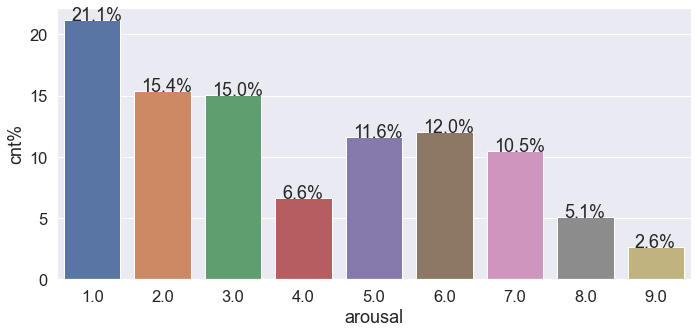

In [258]:
plt.figure(figsize=(25,5))

dual_categories = ['arousal']

plt_cnt = 1;
for feature in dual_categories:
    plt.subplot(1,2,plt_cnt)
    tempdf = get_percentage_cnt(train_b, feature)
    myplot(feature, 'cnt%', tempdf)
    plt_cnt += 1

plt.show()

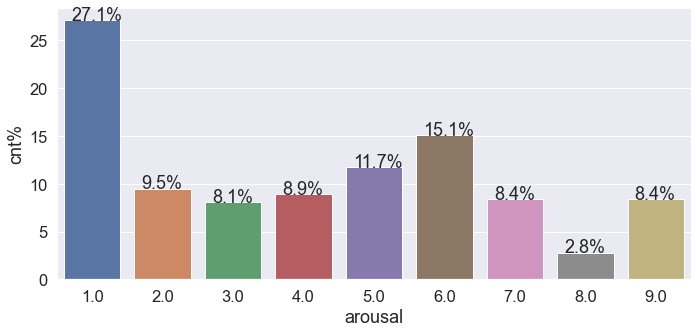

In [259]:
plt.figure(figsize=(25,5))

dual_categories = ['arousal']

plt_cnt = 1;
for feature in dual_categories:
    plt.subplot(1,2,plt_cnt)
    tempdf = get_percentage_cnt(validation_b, feature)
    myplot(feature, 'cnt%', tempdf)
    plt_cnt += 1

plt.show()

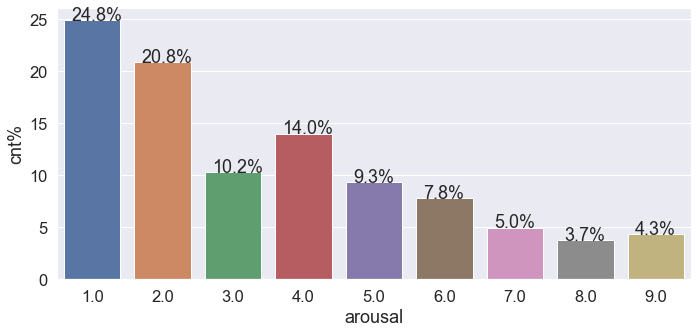

In [260]:
plt.figure(figsize=(25,5))

dual_categories = ['arousal']

plt_cnt = 1;
for feature in dual_categories:
    plt.subplot(1,2,plt_cnt)
    tempdf = get_percentage_cnt(test_b, feature)
    myplot(feature, 'cnt%', tempdf)
    plt_cnt += 1

plt.show()

In [261]:
scaler=StandardScaler()
print(scaler.fit(train_x_b))
print(scaler.transform(train_x_b))

StandardScaler()
[[ 0.80418155 -0.7156805  -0.42364137 ...  0.41743365  0.39206611
   0.22546764]
 [ 0.93124392 -0.81984304 -0.4904234  ... -0.08160961  0.39206611
   0.22546764]
 [ 1.52721003 -1.28255146  0.17315795 ...  0.01728492  0.39206611
   0.22546764]
 ...
 [-0.0487923  -0.0027895   0.14063309 ... -0.25597516  0.39206611
   0.22546764]
 [-0.51136675  0.53122352  0.13014715 ...  1.66179891  0.39206611
   0.22546764]
 [-0.30000472  0.28161744  0.02617917 ...  2.25710731  0.39206611
   0.22546764]]


In [262]:
scaler=StandardScaler()
print(scaler.fit(validation_x_b))
print(scaler.transform(validation_x_b))

StandardScaler()
[[-0.95289285  0.49089409  1.57024789 ... -1.12117296 -1.0278385
   0.318651  ]
 [ 0.68081327 -0.4957261   0.03932183 ...  0.09757302  0.52740514
   0.318651  ]
 [ 1.08224429 -0.70596291 -0.57713015 ... -0.07577016  0.52740514
   0.318651  ]
 ...
 [ 0.44627356 -0.46815343 -0.14055502 ...  0.68255595  0.52740514
   0.318651  ]
 [ 0.98348468 -1.08660713  0.12250869 ...  0.61237926  0.52740514
   0.318651  ]
 [ 1.41324307 -1.5374764   0.36878647 ...  2.71112227  0.25956784
   0.318651  ]]


In [263]:
scaler=StandardScaler()
print(scaler.fit(test_x_b))
print(scaler.transform(test_x_b))

StandardScaler()
[[ 1.68702949 -1.35616555 -1.01511229 ...  0.21050004  0.44441027
   0.05581456]
 [ 1.4141365  -1.17453966 -0.8825298  ... -0.46927514  0.44441027
   0.05581456]
 [ 1.71459405 -1.37408916 -1.10540621 ... -0.29263303  0.44441027
   0.05581456]
 ...
 [ 1.09552179 -1.10809397 -0.83141601 ... -0.21612934  0.44441027
   0.05581456]
 [ 0.91871048 -0.93704312  0.75756107 ...  0.02298242  0.08133906
   0.05581456]
 [ 0.42344376 -0.42605969  1.91025409 ... -1.50725238 -1.64386145
   0.05581456]]


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '7.0'),
  Text(7, 0, '8.0'),
  Text(8, 0, '9.0')])

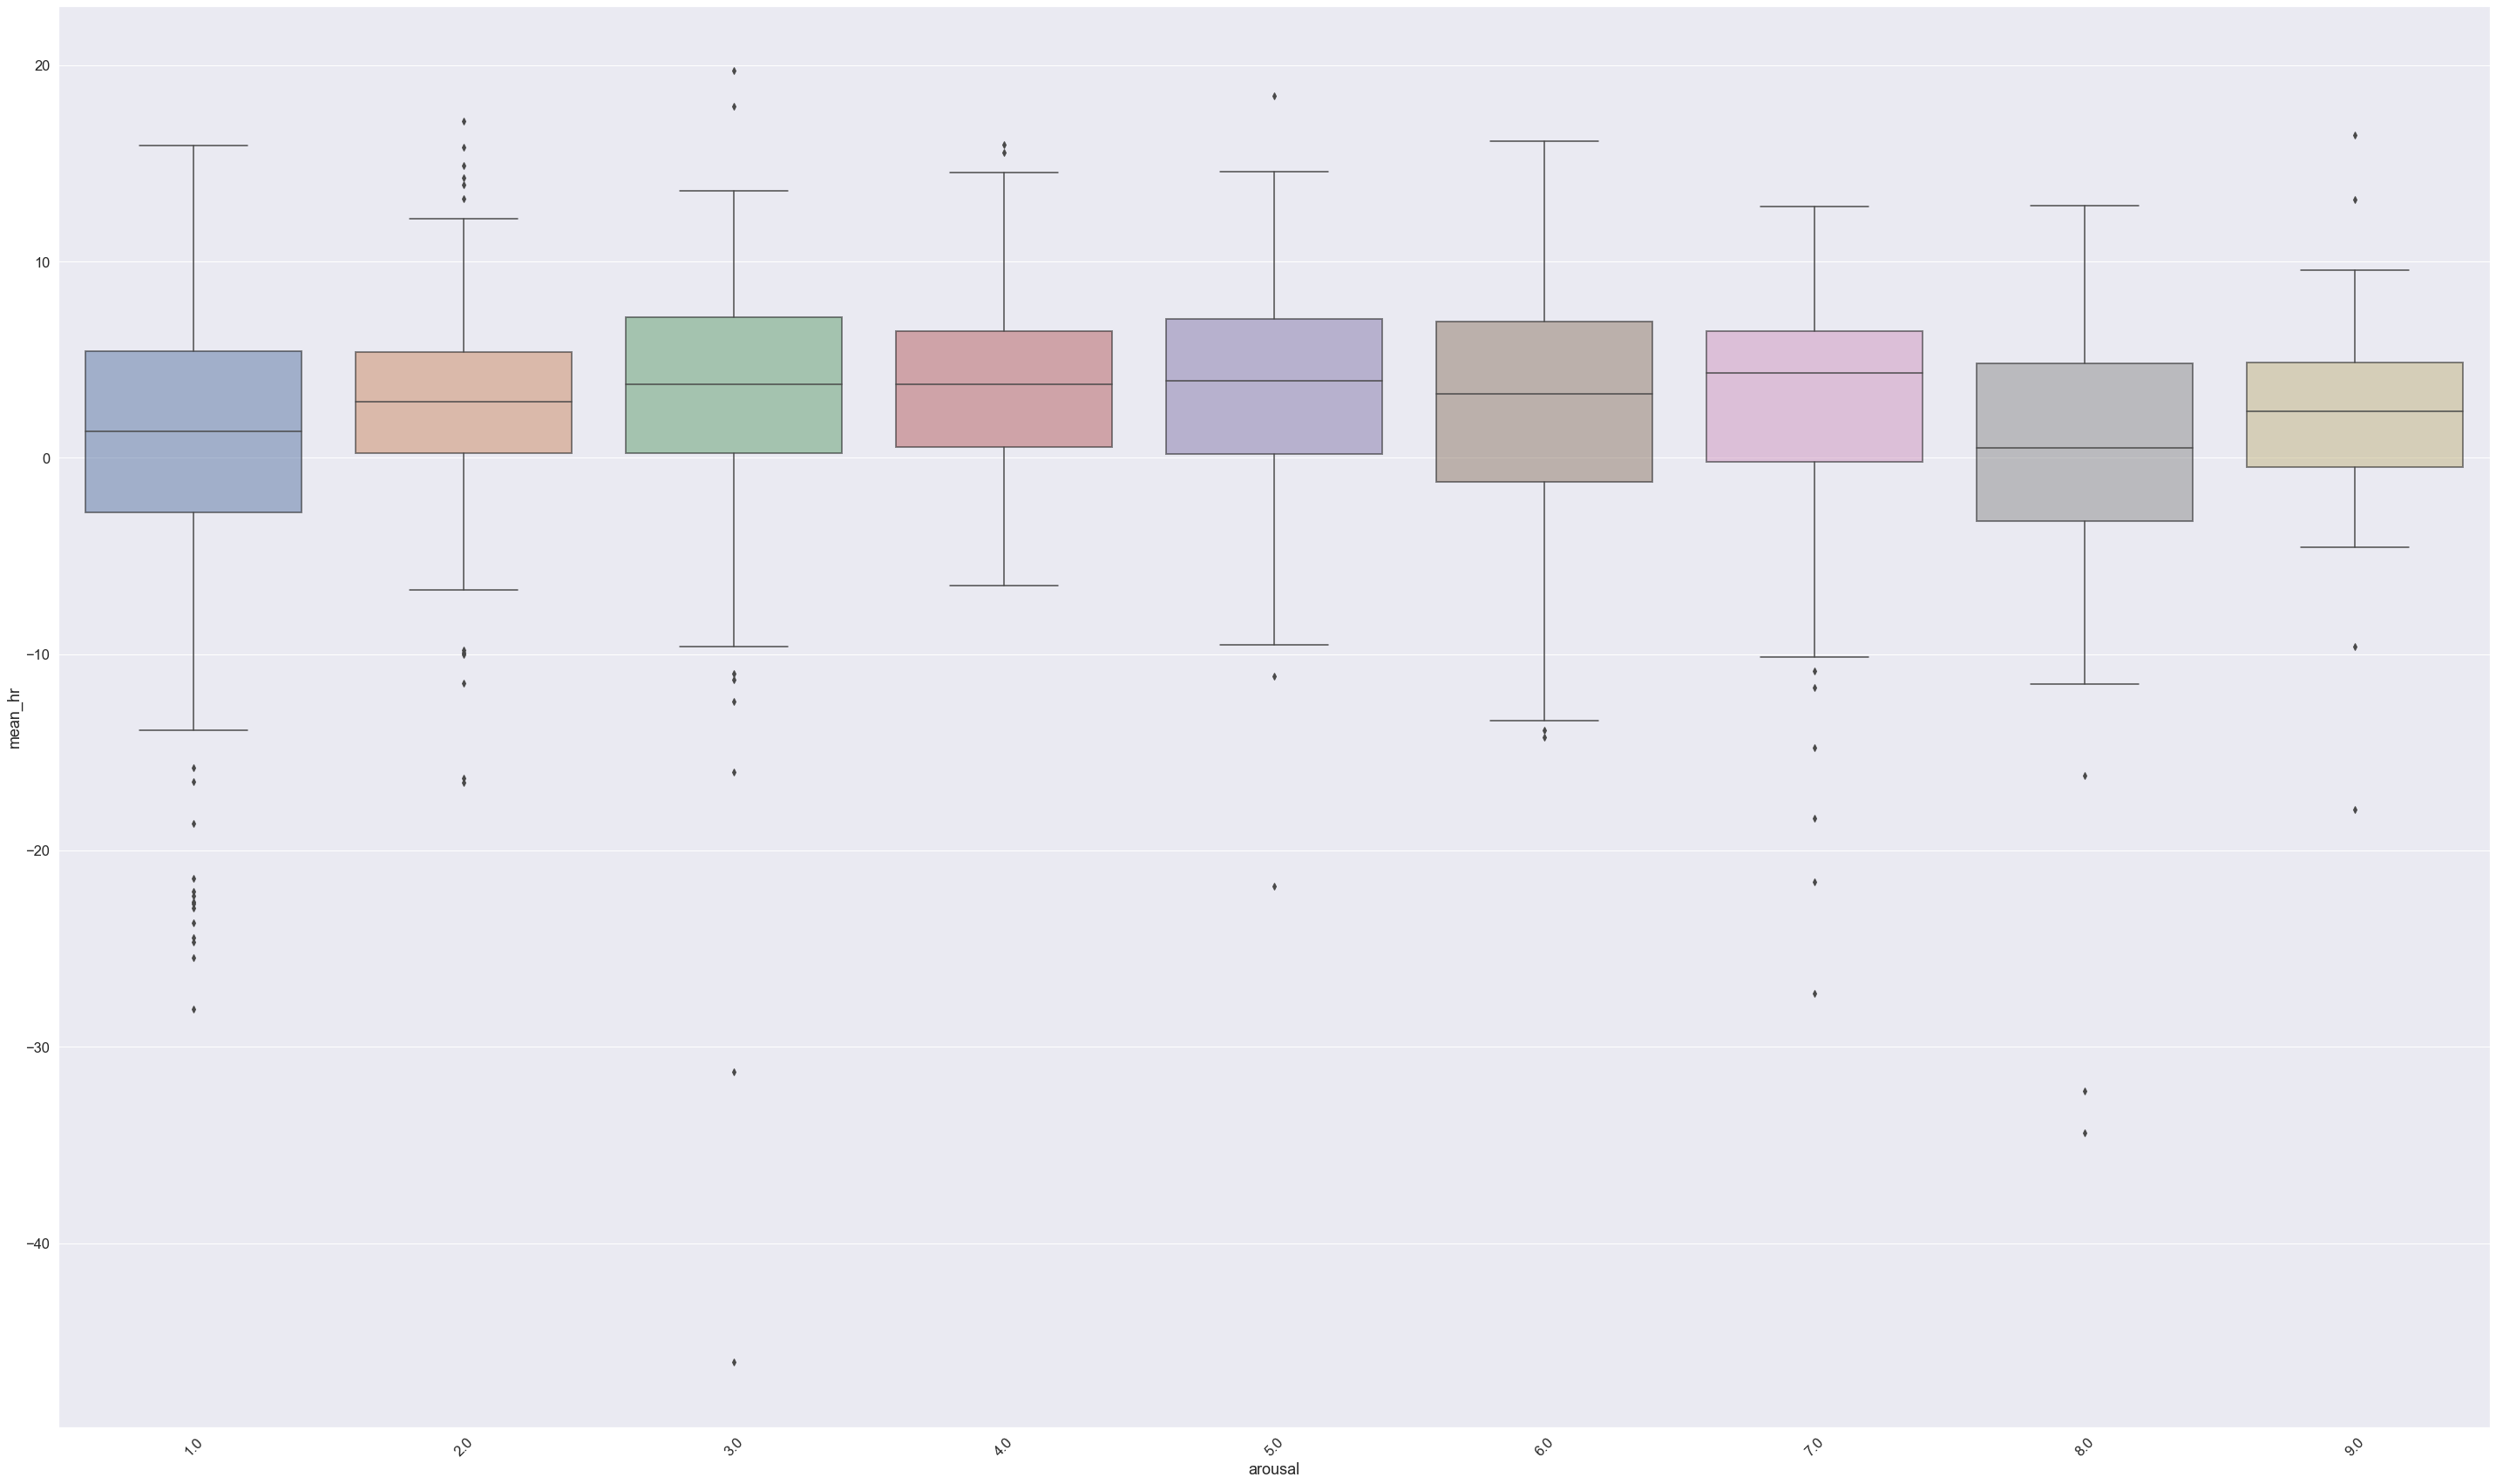

In [264]:
plt.figure(figsize = (50, 30))
ax = sns.boxplot(x='arousal', y='mean_hr', data=train_b)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

In [265]:
dt_b = DecisionTreeRegressor(max_depth=2, max_features='sqrt',random_state=18)
dt_b = dt.fit(train_x_b, train_y_b)
dt_y_b=dt.predict(validation_x_b)
print(dt_y_b)
RoundPredictions(dt_y_b)





[3.75       3.75       3.75       3.75       3.75       3.75
 3.75       3.75       3.75       2.96551724 3.75       3.75
 3.75       3.75       3.75       3.75       3.75       2.96551724
 2.96551724 2.96551724 3.75       2.96551724 3.75       3.75
 3.75       3.75       3.75       3.75       2.96551724 3.75
 3.75       3.75       3.75       3.75       3.75       5.83333333
 2.96551724 3.75       3.75       3.75       3.75       3.75
 3.75       2.96551724 3.75       3.75       3.75       3.75
 3.75       2.96551724 2.96551724 2.96551724 3.75       3.75
 3.75       3.75       3.75       2.96551724 2.96551724 3.75
 3.75       2.96551724 3.75       3.75       3.75       3.75
 3.75       3.75       2.96551724 5.83333333 5.83333333 2.96551724
 3.75       3.75       5.83333333 3.75       3.75       2.96551724
 2.96551724 3.75       2.96551724 3.75       3.75       3.75
 3.75       3.75       3.75       3.75       3.75       3.75
 2.96551724 2.96551724 3.75       3.75       3.75       3.75


In [266]:
print(dt_y_b)

[3. 3. 3. 3. 3. 3. 3. 3. 3. 2. 3. 3. 3. 3. 3. 3. 3. 2. 2. 2. 3. 2. 3. 3.
 3. 3. 3. 3. 2. 3. 3. 3. 3. 3. 3. 6. 2. 3. 3. 3. 3. 3. 3. 2. 3. 3. 3. 3.
 3. 2. 2. 2. 3. 3. 3. 3. 3. 2. 2. 3. 3. 2. 3. 3. 3. 3. 3. 3. 2. 6. 6. 2.
 3. 3. 6. 3. 3. 2. 2. 3. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 2. 2. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 2. 3. 2. 3. 2. 2. 2. 2. 3. 3. 3. 2. 3. 2. 6. 3. 3. 3. 3.
 3. 3. 6. 6. 3. 3. 3. 3. 3. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 5.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 3. 3. 3. 3. 5. 5. 5. 5. 5. 5. 5. 5. 3. 3. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 3. 3. 3. 3. 3. 5. 5. 5. 3. 3. 6. 6. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 6. 6. 6. 6. 3. 3.

In [267]:
mae3 = mean_absolute_error(validation_y_b, dt_y_b)
mse3 = mean_squared_error(validation_y_b,dt_y_b)
rmse3 = np.sqrt(mean_squared_error(validation_y_b,dt_y_b))
r23 = r2_score(validation_y_b, dt_y_b)
# The mean absolute error
print ("Decision Tree Regressor performance:")
print('- Mean absolute error: %.2f' % mae3)

# The mean squared error
print('- Mean squared error: %.2f' % mse3)

# The Root mean squared error
print('- Root mean squared error: %.2f' % rmse3)

# The coefficient of determination: 1 is perfect prediction
print('- Coefficient of determination (R2 score): %.2f' % r23)

Decision Tree Regressor performance:
- Mean absolute error: 2.42
- Mean squared error: 8.48
- Root mean squared error: 2.91
- Coefficient of determination (R2 score): -0.23


In [268]:
dt_b = DecisionTreeRegressor(max_depth=2, max_features='sqrt',random_state=18)
dt_b = dt.fit(train_x_b, train_y_b)
dt_y_b = dt.predict(test_x_b)
RoundPredictions(dt_y_b)
mae3 = mean_absolute_error(test_y_b, dt_y_b)
mse3 = mean_squared_error(test_y_b,dt_y_b)
rmse3 = np.sqrt(mean_squared_error(test_y_b,dt_y_b))
r23 = r2_score(test_y_b, dt_y_b)
# The mean absolute error
print ("Decision Tree Regressor performance:")
print('- Mean absolute error: %.2f' % mae3)

# The mean squared error
print('- Mean squared error: %.2f' % mse3)

# The Root mean squared error
print('- Root mean squared error: %.2f' % rmse3)

# The coefficient of determination: 1 is perfect prediction
print('- Coefficient of determination (R2 score): %.2f' % r23)

Decision Tree Regressor performance:
- Mean absolute error: 2.02
- Mean squared error: 6.43
- Root mean squared error: 2.54
- Coefficient of determination (R2 score): -0.18


c:\Users\Ivona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actual Vs Predicted value')

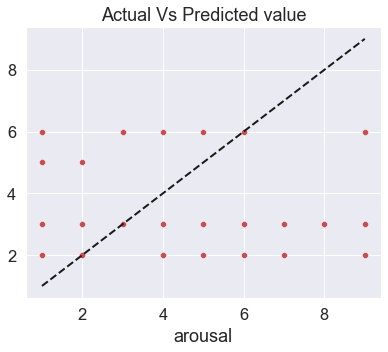

In [269]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(test_y_b,dt_y_b,ax=ax,color='r')
plt.plot([test_y_b.min(), test_y_b.max()], [test_y_b.min(),test_y_b.max()], 'k--', lw=2)
ax.set_title('Actual Vs Predicted value')

In [270]:

rf_b = RandomForestRegressor( max_depth=2, max_features='log2',min_samples_leaf=8, n_estimators=6, random_state=20)

rf_b.fit(train_x_b, train_y_b)

rf_y_b = rf_b.predict(validation_x_b)
RoundPredictions(rf_y_b)
mae3 = mean_absolute_error(validation_y_b, rf_y_b)
mse3 = mean_squared_error(validation_y_b,rf_y_b)
rmse3 = np.sqrt(mean_squared_error(validation_y_b,rf_y_b))
r23 = r2_score(validation_y_b, rf_y_b)
# The mean absolute error
print ("Random Forest Regressor performance:")
print('- Mean absolute error: %.2f' % mae3)

# The mean squared error
print('- Mean squared error: %.2f' % mse3)

# The Root mean squared error
print('- Root mean squared error: %.2f' % rmse3)

# The coefficient of determination: 1 is perfect prediction
print('- Coefficient of determination (R2 score): %.2f' % r23)

Random Forest Regressor performance:
- Mean absolute error: 2.30
- Mean squared error: 7.30
- Root mean squared error: 2.70
- Coefficient of determination (R2 score): -0.06


In [271]:
rf_b.fit(train_x_b, train_y_b)

rf_y_b = rf_b.predict(test_x_b)
RoundPredictions(rf_y_b)
mae3 = mean_absolute_error(test_y_b, rf_y_b)
mse3 = mean_squared_error(test_y_b,rf_y_b)
rmse3 = np.sqrt(mean_squared_error(test_y_b,rf_y_b))
r23 = r2_score(test_y_b, rf_y_b)
# The mean absolute error
print ("Random Forest Regressor performance:")
print('- Mean absolute error: %.2f' % mae3)

# The mean squared error
print('- Mean squared error: %.2f' % mse3)

# The Root mean squared error
print('- Root mean squared error: %.2f' % rmse3)

# The coefficient of determination: 1 is perfect prediction
print('- Coefficient of determination (R2 score): %.2f' % r23)

Random Forest Regressor performance:
- Mean absolute error: 1.95
- Mean squared error: 5.70
- Root mean squared error: 2.39
- Coefficient of determination (R2 score): -0.05


c:\Users\Ivona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actual Vs Predicted value')

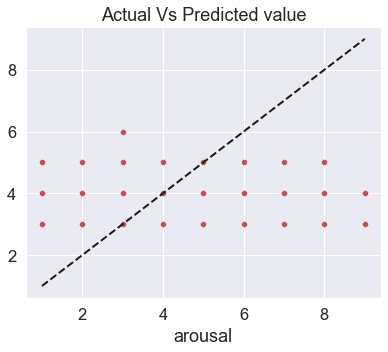

In [272]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(test_y_b,rf_y_b,ax=ax,color='r')
plt.plot([test_y_b.min(), test_y_b.max()], [test_y_b.min(),test_y_b.max()], 'k--', lw=2)
ax.set_title('Actual Vs Predicted value')

In [273]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators = 300, max_depth = 2, learning_rate=0.2)

gb.fit(train_x_b, train_y_b)
gb_y_b = gb.predict(test_x_b)
RoundPredictions(gb_y_b)
mae4= mean_absolute_error(test_y_b, gb_y_b)
mse4 = mean_squared_error(test_y_b,gb_y_b)
rmse4 = np.sqrt(mean_squared_error(test_y_b,gb_y_b))
r24 = r2_score(test_y_b, gb_y_b)
# The mean absolute error
print ("Random Forest Regressor performance:")
print('- Mean absolute error: %.2f' % mae4)

# The mean squared error
print('- Mean squared error: %.2f' % mse4)

# The Root mean squared error
print('- Root mean squared error: %.2f' % rmse4)

# The coefficient of determination: 1 is perfect prediction
print('- Coefficient of determination (R2 score): %.2f' % r24)

Random Forest Regressor performance:
- Mean absolute error: 1.94
- Mean squared error: 6.15
- Root mean squared error: 2.48
- Coefficient of determination (R2 score): -0.13


c:\Users\Ivona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actual Vs Predicted value')

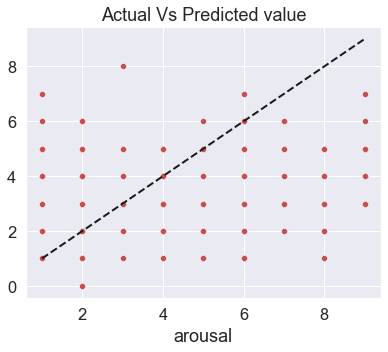

In [274]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(test_y_b,gb_y_b,ax=ax,color='r')
plt.plot([test_y_b.min(), test_y_b.max()], [test_y_b.min(),test_y_b.max()], 'k--', lw=2)
ax.set_title('Actual Vs Predicted value')

In [275]:
from sklearn.svm import SVR
svm_b = SVR(kernel = 'poly',C=100, epsilon=0.9,tol=0.1)

svm_b.fit(train_x_b, train_y_b)

svm_y_b = svm_b.predict(validation_x_b)
RoundPredictions(svm_y_b)
mae4= mean_absolute_error(validation_y_b, svm_y_b)
mse4 = mean_squared_error(validation_y_b,svm_y_b)
rmse4 = np.sqrt(mean_squared_error(validation_y_b,svm_y_b))
r24 = r2_score(validation_y_b, svm_y_b)
# The mean absolute error
print ("Random Forest Regressor performance:")
print('- Mean absolute error: %.2f' % mae4)

# The mean squared error
print('- Mean squared error: %.2f' % mse4)

# The Root mean squared error
print('- Root mean squared error: %.2f' % rmse4)

# The coefficient of determination: 1 is perfect prediction
print('- Coefficient of determination (R2 score): %.2f' % r24)

Random Forest Regressor performance:
- Mean absolute error: 2.28
- Mean squared error: 7.26
- Root mean squared error: 2.69
- Coefficient of determination (R2 score): -0.05


In [276]:
svm_b = SVR(kernel = 'poly',C=100, epsilon=0.9,tol=0.1)

svm_b.fit(train_x_b, train_y_b)

svm_y_b = svm_b.predict(test_x_b)
RoundPredictions(svm_y_b)
mae5= mean_absolute_error(test_y_b, svm_y_b)
mse5 = mean_squared_error(test_y_b,svm_y_b)
rmse5 = np.sqrt(mean_squared_error(test_y_b,svm_y_b))
r25 = r2_score(test_y_b, svm_y_b)
# The mean absolute error
print ("SVR performance:")
print('- Mean absolute error: %.2f' % mae5)

# The mean squared error
print('- Mean squared error: %.2f' % mse5)

# The Root mean squared error
print('- Root mean squared error: %.2f' % rmse5)

# The coefficient of determination: 1 is perfect prediction
print('- Coefficient of determination (R2 score): %.2f' % r25)

SVR performance:
- Mean absolute error: 1.94
- Mean squared error: 5.61
- Root mean squared error: 2.37
- Coefficient of determination (R2 score): -0.03


c:\Users\Ivona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actual Vs Predicted value')

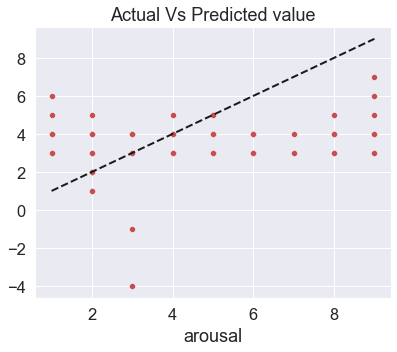

In [304]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(test_y_b,svm_y_b,ax=ax,color='r')
plt.plot([test_y_b.min(), test_y_b.max()], [test_y_b.min(),test_y_b.max()], 'k--', lw=2)
ax.set_title('Actual Vs Predicted value')

In [278]:
from sklearn.ensemble import AdaBoostRegressor
ada_b = AdaBoostRegressor(n_estimators=500, random_state=1)

ada_b.fit(train_x_b, train_y_b)

ada_y_b = ada_b.predict(validation_x_b)
RoundPredictions(ada_y_b)
mae6= mean_absolute_error(validation_y_b, ada_y_b)
mse6 = mean_squared_error(validation_y_b,ada_y_b)
rmse6 = np.sqrt(mean_squared_error(validation_y_b,ada_y_b))
r26 = r2_score(validation_y_b, ada_y_b)
# The mean absolute error
print ("Random Forest Regressor performance:")
print('- Mean absolute error: %.2f' % mae6)

# The mean squared error
print('- Mean squared error: %.2f' % mse6)

# The Root mean squared error
print('- Root mean squared error: %.2f' % rmse6)

# The coefficient of determination: 1 is perfect prediction
print('- Coefficient of determination (R2 score): %.2f' % r26)
 

Random Forest Regressor performance:
- Mean absolute error: 2.19
- Mean squared error: 6.51
- Root mean squared error: 2.55
- Coefficient of determination (R2 score): 0.06


In [279]:
ada_b = AdaBoostRegressor(n_estimators=500, random_state=1)

ada_b.fit(train_x_b, train_y_b)

ada_y_b = ada_b.predict(test_x_b)
RoundPredictions(ada_y_b)
mae7= mean_absolute_error(test_y_b, ada_y_b)
mse7 = mean_squared_error(test_y_b,ada_y_b)
rmse7 = np.sqrt(mean_squared_error(test_y_b,ada_y_b))
r27 = r2_score(test_y_b, ada_y_b)
# The mean absolute error
print ("Random Forest Regressor performance:")
print('- Mean absolute error: %.2f' % mae7)

# The mean squared error
print('- Mean squared error: %.2f' % mse7)

# The Root mean squared error
print('- Root mean squared error: %.2f' % rmse7)

# The coefficient of determination: 1 is perfect prediction
print('- Coefficient of determination (R2 score): %.2f' % r27)

Random Forest Regressor performance:
- Mean absolute error: 1.94
- Mean squared error: 5.48
- Root mean squared error: 2.34
- Coefficient of determination (R2 score): -0.00


c:\Users\Ivona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actual Vs Predicted value')

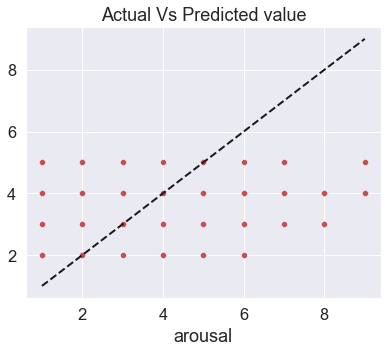

In [280]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(test_y_b,ada_y_b,ax=ax,color='r')
plt.plot([test_y_b.min(), test_y_b.max()], [test_y_b.min(),test_y_b.max()], 'k--', lw=2)
ax.set_title('Actual Vs Predicted value')

In [281]:
from sklearn.feature_selection import RFE
clfRFE =AdaBoostRegressor( n_estimators=500, random_state=1)
rfe = RFE(clfRFE, n_features_to_select = 15)
fit = rfe.fit(train_x_b, train_y_b)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 15
Selected Features: [False False False  True False False  True False  True False False False
 False False  True False False  True  True  True  True  True False False
 False  True False  True False False False  True False  True False False
 False  True  True False False]
Feature Ranking: [ 2 14  4  1 25 26  1 16  1  8 13 21  5 24  1 11  6  1  1  1  1  1  9  3
 15  1 10  1 19 18 12  1 20  1 17  7 22  1  1 23 27]


In [282]:
result = np.where(fit.ranking_ == 1)
result

(array([ 3,  6,  8, 14, 17, 18, 19, 20, 21, 25, 27, 31, 33, 37, 38],
       dtype=int64),)

In [283]:
train_x_RFE_1 =train_x_b.iloc[:,[3,  6,  8, 14, 17, 18, 19, 20, 21, 25, 27, 31, 33, 37, 38]]
test_x_RFE_1=test_x_b.iloc[:,[ 3,  6,  8, 14, 17, 18, 19, 20, 21, 25, 27, 31, 33, 37, 38]]

In [284]:
ada_b.fit(train_x_RFE_1, train_y_b)

ada_y_b = ada_b.predict(test_x_RFE_1)
RoundPredictions(ada_y_b)
mae8= mean_absolute_error(test_y_b, ada_y_b)
mse8 = mean_squared_error(test_y_b,ada_y_b)
rmse8 = np.sqrt(mean_squared_error(test_y_b,ada_y_b))
r28 = r2_score(test_y_b, ada_y_b)
# The mean absolute error
print ("Random Forest Regressor performance:")
print('- Mean absolute error: %.2f' % mae8)

# The mean squared error
print('- Mean squared error: %.2f' % mse8)

# The Root mean squared error
print('- Root mean squared error: %.2f' % rmse8)

# The coefficient of determination: 1 is perfect prediction
print('- Coefficient of determination (R2 score): %.2f' % r28)

Random Forest Regressor performance:
- Mean absolute error: 1.97
- Mean squared error: 5.46
- Root mean squared error: 2.34
- Coefficient of determination (R2 score): -0.00


# MinMax

In [285]:
train_df_n=pd.read_csv('C:\\Users\\Ivona\\Desktop\\Arousal\\Arousal MinMAx\\_TRAIN.CSV')
train_df_n

,mean_hr,ibi,sdnn,median_ibi,sdsd,rmssd,pnn20,pnn50,median_diff,rr_range,...,Cd,Ca,SDNNd,SDNNa,samp_ent,sqi_sdnn,IMU_filter_quality,video,arousal,valence
0,0.262105,0.678782,0.388164,0.666667,0.236601,0.236668,0.805648,0.546559,NaN,0.352941,...,0.410323,0.589677,0.344292,0.441956,0.639739,NaN,NaN,GroupA\01,7.0,3.0
1,0.294227,0.642921,0.341939,0.583333,0.141316,0.144228,0.694352,0.355030,NaN,0.294118,...,0.000000,1.000000,0.139452,0.422833,0.489896,NaN,NaN,GroupA\01,7.0,3.0
2,0.444887,0.483624,0.801259,0.500000,0.934135,0.934225,0.548092,0.337711,NaN,0.941176,...,0.619864,0.380136,0.827070,0.796717,0.519590,NaN,NaN,GroupA\01,7.0,3.0
3,0.635639,0.300827,0.808176,0.333333,0.879374,0.879395,0.101857,0.209790,NaN,1.000000,...,0.621294,0.378706,0.833661,0.801825,0.333012,NaN,NaN,NaN,NaN,NaN
4,0.716362,0.229107,0.907210,0.166667,1.000000,1.000000,0.052302,0.131868,NaN,1.000000,...,0.623860,0.376140,0.944605,0.906045,0.214585,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062,0.826930,0.148598,0.406405,0.250000,0.305029,0.305074,0.393586,0.186044,0.0,0.470588,...,0.549340,0.450660,0.417727,0.393218,0.171096,1.0,NaN,GroupB\09,6.0,8.0
2063,0.585245,0.371460,0.400273,0.500000,0.301596,0.302032,0.448688,0.129708,0.0,0.470588,...,0.609757,0.390243,0.417489,0.369624,0.645318,1.0,NaN,GroupB\09,6.0,8.0
2064,0.695677,0.267291,0.339465,0.500000,0.163971,0.164037,0.367347,0.196878,0.0,0.411765,...,0.525595,0.474405,0.340523,0.329049,0.792524,1.0,NaN,GroupB\09,6.0,8.0
2065,0.613713,0.344216,0.345969,0.500000,0.200989,0.201572,0.507590,0.555891,0.0,0.411765,...,0.571512,0.428488,0.352387,0.323965,0.699231,1.0,NaN,NaN,NaN,8.0


In [286]:
validation_df_n=pd.read_csv('C:\\Users\\Ivona\\Desktop\\Arousal\\Arousal MinMAx\\_VALIDATION.CSV')
validation_df_n

,mean_hr,ibi,sdnn,median_ibi,sdsd,rmssd,pnn20,pnn50,median_diff,rr_range,...,Cd,Ca,SDNNd,SDNNa,samp_ent,sqi_sdnn,IMU_filter_quality,video,arousal,valence
0,0.923255,0.054525,0.131125,0.500000,0.168649,0.168266,0.287274,0.182073,NaN,0.229167,...,0.664910,0.335090,0.134846,0.129323,0.388737,1.000000,1.0,NaN,NaN,NaN
1,0.597614,0.318401,0.485040,0.500000,0.490722,0.490484,0.358193,0.333333,NaN,0.416667,...,0.356136,0.643864,0.368224,0.583114,0.427096,0.773270,1.0,NaN,NaN,NaN
2,0.420304,0.488983,0.644540,0.500000,0.709215,0.709092,0.340720,0.464286,NaN,0.416667,...,0.436011,0.563989,0.539210,0.740551,0.084225,0.462540,1.0,NaN,NaN,NaN
3,0.521177,0.389276,0.615916,0.500000,0.554993,0.557511,0.119551,0.390977,NaN,0.416667,...,0.241070,0.758930,0.368399,0.719709,0.000000,0.518304,1.0,GroupB\07,7.0,7.0
4,0.863747,0.098646,0.198495,0.500000,0.238656,0.239230,0.246433,0.280323,NaN,0.229167,...,0.449197,0.550803,0.137174,0.197153,0.324687,1.000000,1.0,GroupB\07,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,0.114137,0.860115,0.736238,0.777778,0.676117,0.676184,0.838863,0.560327,1.00,0.782609,...,0.319780,0.680220,0.688912,0.681376,0.458769,0.586572,NaN,GroupA\04,5.0,6.0
485,0.213692,0.744577,0.361308,0.666667,0.286507,0.285944,1.000000,0.503270,1.00,0.260870,...,0.593421,0.406579,0.400956,0.335964,0.475589,1.000000,NaN,GroupA\04,5.0,6.0
486,0.248008,0.706065,0.493208,0.777778,0.409326,0.408647,0.758294,0.617384,0.50,0.391304,...,0.558069,0.441931,0.544759,0.463536,0.458769,1.000000,NaN,NaN,NaN,NaN
487,0.431405,0.510799,0.502106,0.444444,0.503270,0.502683,0.703856,0.561869,0.00,0.434783,...,0.332538,0.667462,0.509014,0.512517,0.458769,1.000000,NaN,GroupA\05,3.0,4.0


In [287]:
test_df_n=pd.read_csv('C:\\Users\\Ivona\\Desktop\\Arousal\\Arousal MinMAx\\TEST_.CSV')
test_df_n

,mean_hr,ibi,sdnn,median_ibi,sdsd,rmssd,pnn20,pnn50,median_diff,rr_range,...,Cd,Ca,SDNNd,SDNNa,samp_ent,sqi_sdnn,IMU_filter_quality,video,arousal,valence
0,0.816011,0.158758,0.077589,0.000000,0.057361,0.057136,0.482500,0.263301,1.0,0.000000,...,0.737393,0.262607,0.089511,0.065336,0.408345,1.000000,NaN,GroupD\16,5.0,2.0
1,0.707879,0.256727,0.204078,0.333333,0.063402,0.063583,0.551282,0.110283,1.0,0.052632,...,0.854244,0.145756,0.225645,0.168512,0.504864,1.000000,NaN,NaN,NaN,NaN
2,0.658645,0.302545,0.207092,0.333333,0.058352,0.058116,0.551282,0.055142,1.0,0.052632,...,0.762847,0.237153,0.221010,0.187064,0.259866,1.000000,NaN,NaN,NaN,NaN
3,0.691375,0.272000,0.153564,0.333333,0.000000,0.000000,0.171795,0.000000,1.0,0.052632,...,0.725145,0.274855,0.155427,0.132405,0.272362,1.000000,NaN,GroupD\17,7.0,2.0
4,0.828600,0.147583,0.025847,0.000000,0.039929,0.039884,0.112500,0.263301,1.0,0.000000,...,0.651107,0.348893,0.026953,0.018907,0.307698,1.000000,NaN,GroupD\17,7.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.575357,0.366998,0.187172,0.347826,0.220627,0.220725,0.654342,0.561901,0.5,0.321429,...,0.669347,0.330653,0.189531,0.187672,0.575917,1.000000,NaN,GroupD\20,2.0,1.0
480,0.574090,0.368203,0.025746,0.521739,0.003042,0.003047,0.370231,0.192410,0.5,0.035714,...,0.663678,0.336322,0.026627,0.029850,0.721057,1.000000,NaN,GroupD\20,2.0,1.0
481,0.438840,0.501124,0.000000,0.521739,0.007624,0.007626,0.392479,0.175320,0.5,0.035714,...,0.739065,0.260935,0.008834,0.000000,0.557886,1.000000,NaN,GroupD\20,2.0,1.0
482,0.371573,0.570551,0.472228,0.521739,0.233958,0.235527,0.495315,0.230007,0.5,0.607143,...,0.384871,0.615129,0.361402,0.496446,0.605285,0.879816,NaN,GroupD\20,2.0,1.0


In [288]:
del train_df_n['video']
del train_df_n['valence']
del train_df_n['median_diff']
del train_df_n['sqi_sdnn']
del train_df_n['IMU_filter_quality']
train_df_n.dropna(axis=0, inplace=True, subset=['arousal'])
train_df_n

,mean_hr,ibi,sdnn,median_ibi,sdsd,rmssd,pnn20,pnn50,rr_range,rr_iqrange,...,C2d,C2a,SD2d,SD2a,Cd,Ca,SDNNd,SDNNa,samp_ent,arousal
0,0.262105,0.678782,0.388164,0.666667,0.236601,0.236668,0.805648,0.546559,0.352941,0.300000,...,0.337479,0.662521,0.361851,0.490049,0.410323,0.589677,0.344292,0.441956,0.639739,7.0
1,0.294227,0.642921,0.341939,0.583333,0.141316,0.144228,0.694352,0.355030,0.294118,0.200000,...,0.000000,1.000000,0.169493,0.471640,0.000000,1.000000,0.139452,0.422833,0.489896,7.0
2,0.444887,0.483624,0.801259,0.500000,0.934135,0.934225,0.548092,0.337711,0.941176,0.200000,...,0.616655,0.383345,0.651497,0.599757,0.619864,0.380136,0.827070,0.796717,0.519590,7.0
8,0.357932,0.573825,0.254169,0.666667,0.092897,0.093255,0.588621,0.288462,0.176471,0.200000,...,0.662763,0.337237,0.326744,0.273094,0.688449,0.311551,0.268702,0.231606,0.408080,8.0
9,0.395931,0.533842,0.108389,0.500000,0.050763,0.050868,0.465532,0.115385,0.117647,0.200000,...,0.611097,0.388903,0.152229,0.131938,0.613437,0.386563,0.114625,0.112847,0.327544,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,0.358426,0.598829,0.127251,0.750000,0.022262,0.023167,0.236152,0.251048,0.117647,0.000000,...,0.545478,0.454522,0.236373,0.211492,0.841427,0.158573,0.150400,0.076663,0.187953,2.0
2059,0.270713,0.691980,0.058334,0.750000,0.023789,0.023789,0.286006,0.129708,0.058824,0.333333,...,0.461037,0.538963,0.120438,0.140023,0.614689,0.385311,0.060821,0.045623,0.157450,2.0
2062,0.826930,0.148598,0.406405,0.250000,0.305029,0.305074,0.393586,0.186044,0.470588,0.416667,...,0.328892,0.671108,0.445836,0.579022,0.549340,0.450660,0.417727,0.393218,0.171096,6.0
2063,0.585245,0.371460,0.400273,0.500000,0.301596,0.302032,0.448688,0.129708,0.470588,0.333333,...,0.353127,0.646873,0.438346,0.548650,0.609757,0.390243,0.417489,0.369624,0.645318,6.0


In [289]:
del validation_df_n['video']
del validation_df_n['valence']
del validation_df_n['median_diff']
del validation_df_n['sqi_sdnn']
del validation_df_n['IMU_filter_quality']
validation_df_n.dropna(axis=0, inplace=True, subset=['arousal'])
validation_df_n

,mean_hr,ibi,sdnn,median_ibi,sdsd,rmssd,pnn20,pnn50,rr_range,rr_iqrange,...,C2d,C2a,SD2d,SD2a,Cd,Ca,SDNNd,SDNNa,samp_ent,arousal
3,0.521177,0.389276,0.615916,0.500000,0.554993,0.557511,0.119551,0.390977,0.416667,0.190476,...,0.124677,0.875323,0.287816,0.749996,0.241070,0.758930,0.368399,0.719709,0.000000,7.0
4,0.863747,0.098646,0.198495,0.500000,0.238656,0.239230,0.246433,0.280323,0.229167,0.190476,...,0.418623,0.581377,0.107240,0.158571,0.449197,0.550803,0.137174,0.197153,0.324687,7.0
5,0.947922,0.036716,0.030414,0.500000,0.015380,0.015007,0.134223,0.101299,0.041667,0.190476,...,0.609848,0.390152,0.042588,0.041054,0.646867,0.353133,0.031734,0.029664,0.278507,7.0
8,0.655875,0.266870,0.399807,0.500000,0.460981,0.461128,0.938215,0.645963,0.270833,0.380952,...,0.643700,0.356300,0.357981,0.336713,0.678426,0.321574,0.396374,0.379841,0.598909,9.0
9,0.642675,0.278364,0.286514,0.500000,0.335177,0.335025,0.671564,0.524845,0.250000,0.380952,...,0.400138,0.599862,0.208687,0.303474,0.556228,0.443772,0.263397,0.305338,0.502173,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,0.538504,0.404382,0.639079,0.444444,0.741983,0.741700,0.758294,0.560327,0.913043,0.208333,...,0.764213,0.235787,0.622994,0.305327,0.472403,0.527597,0.697768,0.623524,0.458769,5.0
484,0.114137,0.860115,0.736238,0.777778,0.676117,0.676184,0.838863,0.560327,0.782609,0.666667,...,0.543676,0.456324,0.706254,0.513729,0.319780,0.680220,0.688912,0.681376,0.458769,5.0
485,0.213692,0.744577,0.361308,0.666667,0.286507,0.285944,1.000000,0.503270,0.260870,0.375000,...,0.533884,0.466116,0.474505,0.347312,0.593421,0.406579,0.400956,0.335964,0.475589,5.0
487,0.431405,0.510799,0.502106,0.444444,0.503270,0.502683,0.703856,0.561869,0.434783,0.625000,...,0.183820,0.816180,0.392707,0.512718,0.332538,0.667462,0.509014,0.512517,0.458769,3.0


In [290]:
del test_df_n['video']
del test_df_n['valence']
del test_df_n['median_diff']
del test_df_n['sqi_sdnn']
del test_df_n['IMU_filter_quality']
test_df_n.dropna(axis=0, inplace=True, subset=['arousal'])
test_df_n

,mean_hr,ibi,sdnn,median_ibi,sdsd,rmssd,pnn20,pnn50,rr_range,rr_iqrange,...,C2d,C2a,SD2d,SD2a,Cd,Ca,SDNNd,SDNNa,samp_ent,arousal
0,0.816011,0.158758,0.077589,0.000000,0.057361,0.057136,0.482500,0.263301,0.000000,0.333333,...,0.587778,0.412222,0.196683,0.083102,0.737393,0.262607,0.089511,0.065336,0.408345,5.0
3,0.691375,0.272000,0.153564,0.333333,0.000000,0.000000,0.171795,0.000000,0.052632,0.333333,...,0.481313,0.518687,0.326899,0.230038,0.725145,0.274855,0.155427,0.132405,0.272362,7.0
4,0.828600,0.147583,0.025847,0.000000,0.039929,0.039884,0.112500,0.263301,0.000000,0.000000,...,0.440326,0.559674,0.085944,0.028638,0.651107,0.348893,0.026953,0.018907,0.307698,7.0
5,1.000000,0.000000,0.077569,0.000000,0.103918,0.103833,0.056098,0.408855,0.052632,0.333333,...,0.370602,0.629398,0.113037,0.072716,0.566704,0.433296,0.068291,0.077597,0.460918,7.0
8,0.490116,0.465455,0.075140,0.333333,0.040272,0.040087,0.136842,0.345360,0.105263,0.000000,...,0.298337,0.701663,0.154170,0.134759,0.545436,0.454564,0.068413,0.082041,0.321949,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.575357,0.366998,0.187172,0.347826,0.220627,0.220725,0.654342,0.561901,0.321429,0.218750,...,0.690858,0.309142,0.141859,0.083904,0.669347,0.330653,0.189531,0.187672,0.575917,2.0
480,0.574090,0.368203,0.025746,0.521739,0.003042,0.003047,0.370231,0.192410,0.035714,0.125000,...,0.474476,0.525524,0.043351,0.064821,0.663678,0.336322,0.026627,0.029850,0.721057,2.0
481,0.438840,0.501124,0.000000,0.521739,0.007624,0.007626,0.392479,0.175320,0.035714,0.125000,...,0.566050,0.433950,0.018594,0.016926,0.739065,0.260935,0.008834,0.000000,0.557886,2.0
482,0.371573,0.570551,0.472228,0.521739,0.233958,0.235527,0.495315,0.230007,0.607143,0.187500,...,0.000000,1.000000,0.269438,0.662783,0.384871,0.615129,0.361402,0.496446,0.605285,2.0


In [291]:
train_x_n=train_df_n.drop(['arousal'], axis=1)
train_x_n

,mean_hr,ibi,sdnn,median_ibi,sdsd,rmssd,pnn20,pnn50,rr_range,rr_iqrange,...,SD1a,C2d,C2a,SD2d,SD2a,Cd,Ca,SDNNd,SDNNa,samp_ent
0,0.262105,0.678782,0.388164,0.666667,0.236601,0.236668,0.805648,0.546559,0.352941,0.300000,...,0.223053,0.337479,0.662521,0.361851,0.490049,0.410323,0.589677,0.344292,0.441956,0.639739
1,0.294227,0.642921,0.341939,0.583333,0.141316,0.144228,0.694352,0.355030,0.294118,0.200000,...,0.206932,0.000000,1.000000,0.169493,0.471640,0.000000,1.000000,0.139452,0.422833,0.489896
2,0.444887,0.483624,0.801259,0.500000,0.934135,0.934225,0.548092,0.337711,0.941176,0.200000,...,0.938110,0.616655,0.383345,0.651497,0.599757,0.619864,0.380136,0.827070,0.796717,0.519590
8,0.357932,0.573825,0.254169,0.666667,0.092897,0.093255,0.588621,0.288462,0.176471,0.200000,...,0.090315,0.662763,0.337237,0.326744,0.273094,0.688449,0.311551,0.268702,0.231606,0.408080
9,0.395931,0.533842,0.108389,0.500000,0.050763,0.050868,0.465532,0.115385,0.117647,0.200000,...,0.067106,0.611097,0.388903,0.152229,0.131938,0.613437,0.386563,0.114625,0.112847,0.327544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,0.358426,0.598829,0.127251,0.750000,0.022262,0.023167,0.236152,0.251048,0.117647,0.000000,...,0.011408,0.545478,0.454522,0.236373,0.211492,0.841427,0.158573,0.150400,0.076663,0.187953
2059,0.270713,0.691980,0.058334,0.750000,0.023789,0.023789,0.286006,0.129708,0.058824,0.333333,...,0.030814,0.461037,0.538963,0.120438,0.140023,0.614689,0.385311,0.060821,0.045623,0.157450
2062,0.826930,0.148598,0.406405,0.250000,0.305029,0.305074,0.393586,0.186044,0.470588,0.416667,...,0.241372,0.328892,0.671108,0.445836,0.579022,0.549340,0.450660,0.417727,0.393218,0.171096
2063,0.585245,0.371460,0.400273,0.500000,0.301596,0.302032,0.448688,0.129708,0.470588,0.333333,...,0.227766,0.353127,0.646873,0.438346,0.548650,0.609757,0.390243,0.417489,0.369624,0.645318


In [292]:
validation_x_n=validation_df_n.drop(['arousal'], axis=1)
validation_x_n

,mean_hr,ibi,sdnn,median_ibi,sdsd,rmssd,pnn20,pnn50,rr_range,rr_iqrange,...,SD1a,C2d,C2a,SD2d,SD2a,Cd,Ca,SDNNd,SDNNa,samp_ent
3,0.521177,0.389276,0.615916,0.500000,0.554993,0.557511,0.119551,0.390977,0.416667,0.190476,...,0.548818,0.124677,0.875323,0.287816,0.749996,0.241070,0.758930,0.368399,0.719709,0.000000
4,0.863747,0.098646,0.198495,0.500000,0.238656,0.239230,0.246433,0.280323,0.229167,0.190476,...,0.249462,0.418623,0.581377,0.107240,0.158571,0.449197,0.550803,0.137174,0.197153,0.324687
5,0.947922,0.036716,0.030414,0.500000,0.015380,0.015007,0.134223,0.101299,0.041667,0.190476,...,0.015659,0.609848,0.390152,0.042588,0.041054,0.646867,0.353133,0.031734,0.029664,0.278507
8,0.655875,0.266870,0.399807,0.500000,0.460981,0.461128,0.938215,0.645963,0.270833,0.380952,...,0.420930,0.643700,0.356300,0.357981,0.336713,0.678426,0.321574,0.396374,0.379841,0.598909
9,0.642675,0.278364,0.286514,0.500000,0.335177,0.335025,0.671564,0.524845,0.250000,0.380952,...,0.278755,0.400138,0.599862,0.208687,0.303474,0.556228,0.443772,0.263397,0.305338,0.502173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,0.538504,0.404382,0.639079,0.444444,0.741983,0.741700,0.758294,0.560327,0.913043,0.208333,...,0.758249,0.764213,0.235787,0.622994,0.305327,0.472403,0.527597,0.697768,0.623524,0.458769
484,0.114137,0.860115,0.736238,0.777778,0.676117,0.676184,0.838863,0.560327,0.782609,0.666667,...,0.714692,0.543676,0.456324,0.706254,0.513729,0.319780,0.680220,0.688912,0.681376,0.458769
485,0.213692,0.744577,0.361308,0.666667,0.286507,0.285944,1.000000,0.503270,0.260870,0.375000,...,0.271271,0.533884,0.466116,0.474505,0.347312,0.593421,0.406579,0.400956,0.335964,0.475589
487,0.431405,0.510799,0.502106,0.444444,0.503270,0.502683,0.703856,0.561869,0.434783,0.625000,...,0.428634,0.183820,0.816180,0.392707,0.512718,0.332538,0.667462,0.509014,0.512517,0.458769


In [293]:
test_x_n=test_df_n.drop(['arousal'], axis=1)
test_x_n

,mean_hr,ibi,sdnn,median_ibi,sdsd,rmssd,pnn20,pnn50,rr_range,rr_iqrange,...,SD1a,C2d,C2a,SD2d,SD2a,Cd,Ca,SDNNd,SDNNa,samp_ent
0,0.816011,0.158758,0.077589,0.000000,0.057361,0.057136,0.482500,0.263301,0.000000,0.333333,...,0.091417,0.587778,0.412222,0.196683,0.083102,0.737393,0.262607,0.089511,0.065336,0.408345
3,0.691375,0.272000,0.153564,0.333333,0.000000,0.000000,0.171795,0.000000,0.052632,0.333333,...,0.000000,0.481313,0.518687,0.326899,0.230038,0.725145,0.274855,0.155427,0.132405,0.272362
4,0.828600,0.147583,0.025847,0.000000,0.039929,0.039884,0.112500,0.263301,0.000000,0.000000,...,0.059011,0.440326,0.559674,0.085944,0.028638,0.651107,0.348893,0.026953,0.018907,0.307698
5,1.000000,0.000000,0.077569,0.000000,0.103918,0.103833,0.056098,0.408855,0.052632,0.333333,...,0.134342,0.370602,0.629398,0.113037,0.072716,0.566704,0.433296,0.068291,0.077597,0.460918
8,0.490116,0.465455,0.075140,0.333333,0.040272,0.040087,0.136842,0.345360,0.105263,0.000000,...,0.048181,0.298337,0.701663,0.154170,0.134759,0.545436,0.454564,0.068413,0.082041,0.321949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.575357,0.366998,0.187172,0.347826,0.220627,0.220725,0.654342,0.561901,0.321429,0.218750,...,0.251667,0.690858,0.309142,0.141859,0.083904,0.669347,0.330653,0.189531,0.187672,0.575917
480,0.574090,0.368203,0.025746,0.521739,0.003042,0.003047,0.370231,0.192410,0.035714,0.125000,...,0.024079,0.474476,0.525524,0.043351,0.064821,0.663678,0.336322,0.026627,0.029850,0.721057
481,0.438840,0.501124,0.000000,0.521739,0.007624,0.007626,0.392479,0.175320,0.035714,0.125000,...,0.029887,0.566050,0.433950,0.018594,0.016926,0.739065,0.260935,0.008834,0.000000,0.557886
482,0.371573,0.570551,0.472228,0.521739,0.233958,0.235527,0.495315,0.230007,0.607143,0.187500,...,0.074874,0.000000,1.000000,0.269438,0.662783,0.384871,0.615129,0.361402,0.496446,0.605285


In [294]:
train_y_n=train_df_n["arousal"]
train_y_n

0       7.0
1       7.0
2       7.0
8       8.0
9       8.0
       ... 
2058    2.0
2059    2.0
2062    6.0
2063    6.0
2064    6.0
Name: arousal, Length: 1509, dtype: float64

In [295]:
validation_y_n=validation_df_n["arousal"]
validation_y_n

3      7.0
4      7.0
5      7.0
8      9.0
9      9.0
      ... 
483    5.0
484    5.0
485    5.0
487    3.0
488    3.0
Name: arousal, Length: 358, dtype: float64

In [296]:
test_y_n=test_df_n["arousal"]
test_y_n

0      5.0
3      7.0
4      7.0
5      7.0
8      2.0
      ... 
479    2.0
480    2.0
481    2.0
482    2.0
483    2.0
Name: arousal, Length: 322, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '7.0'),
  Text(7, 0, '8.0'),
  Text(8, 0, '9.0')])

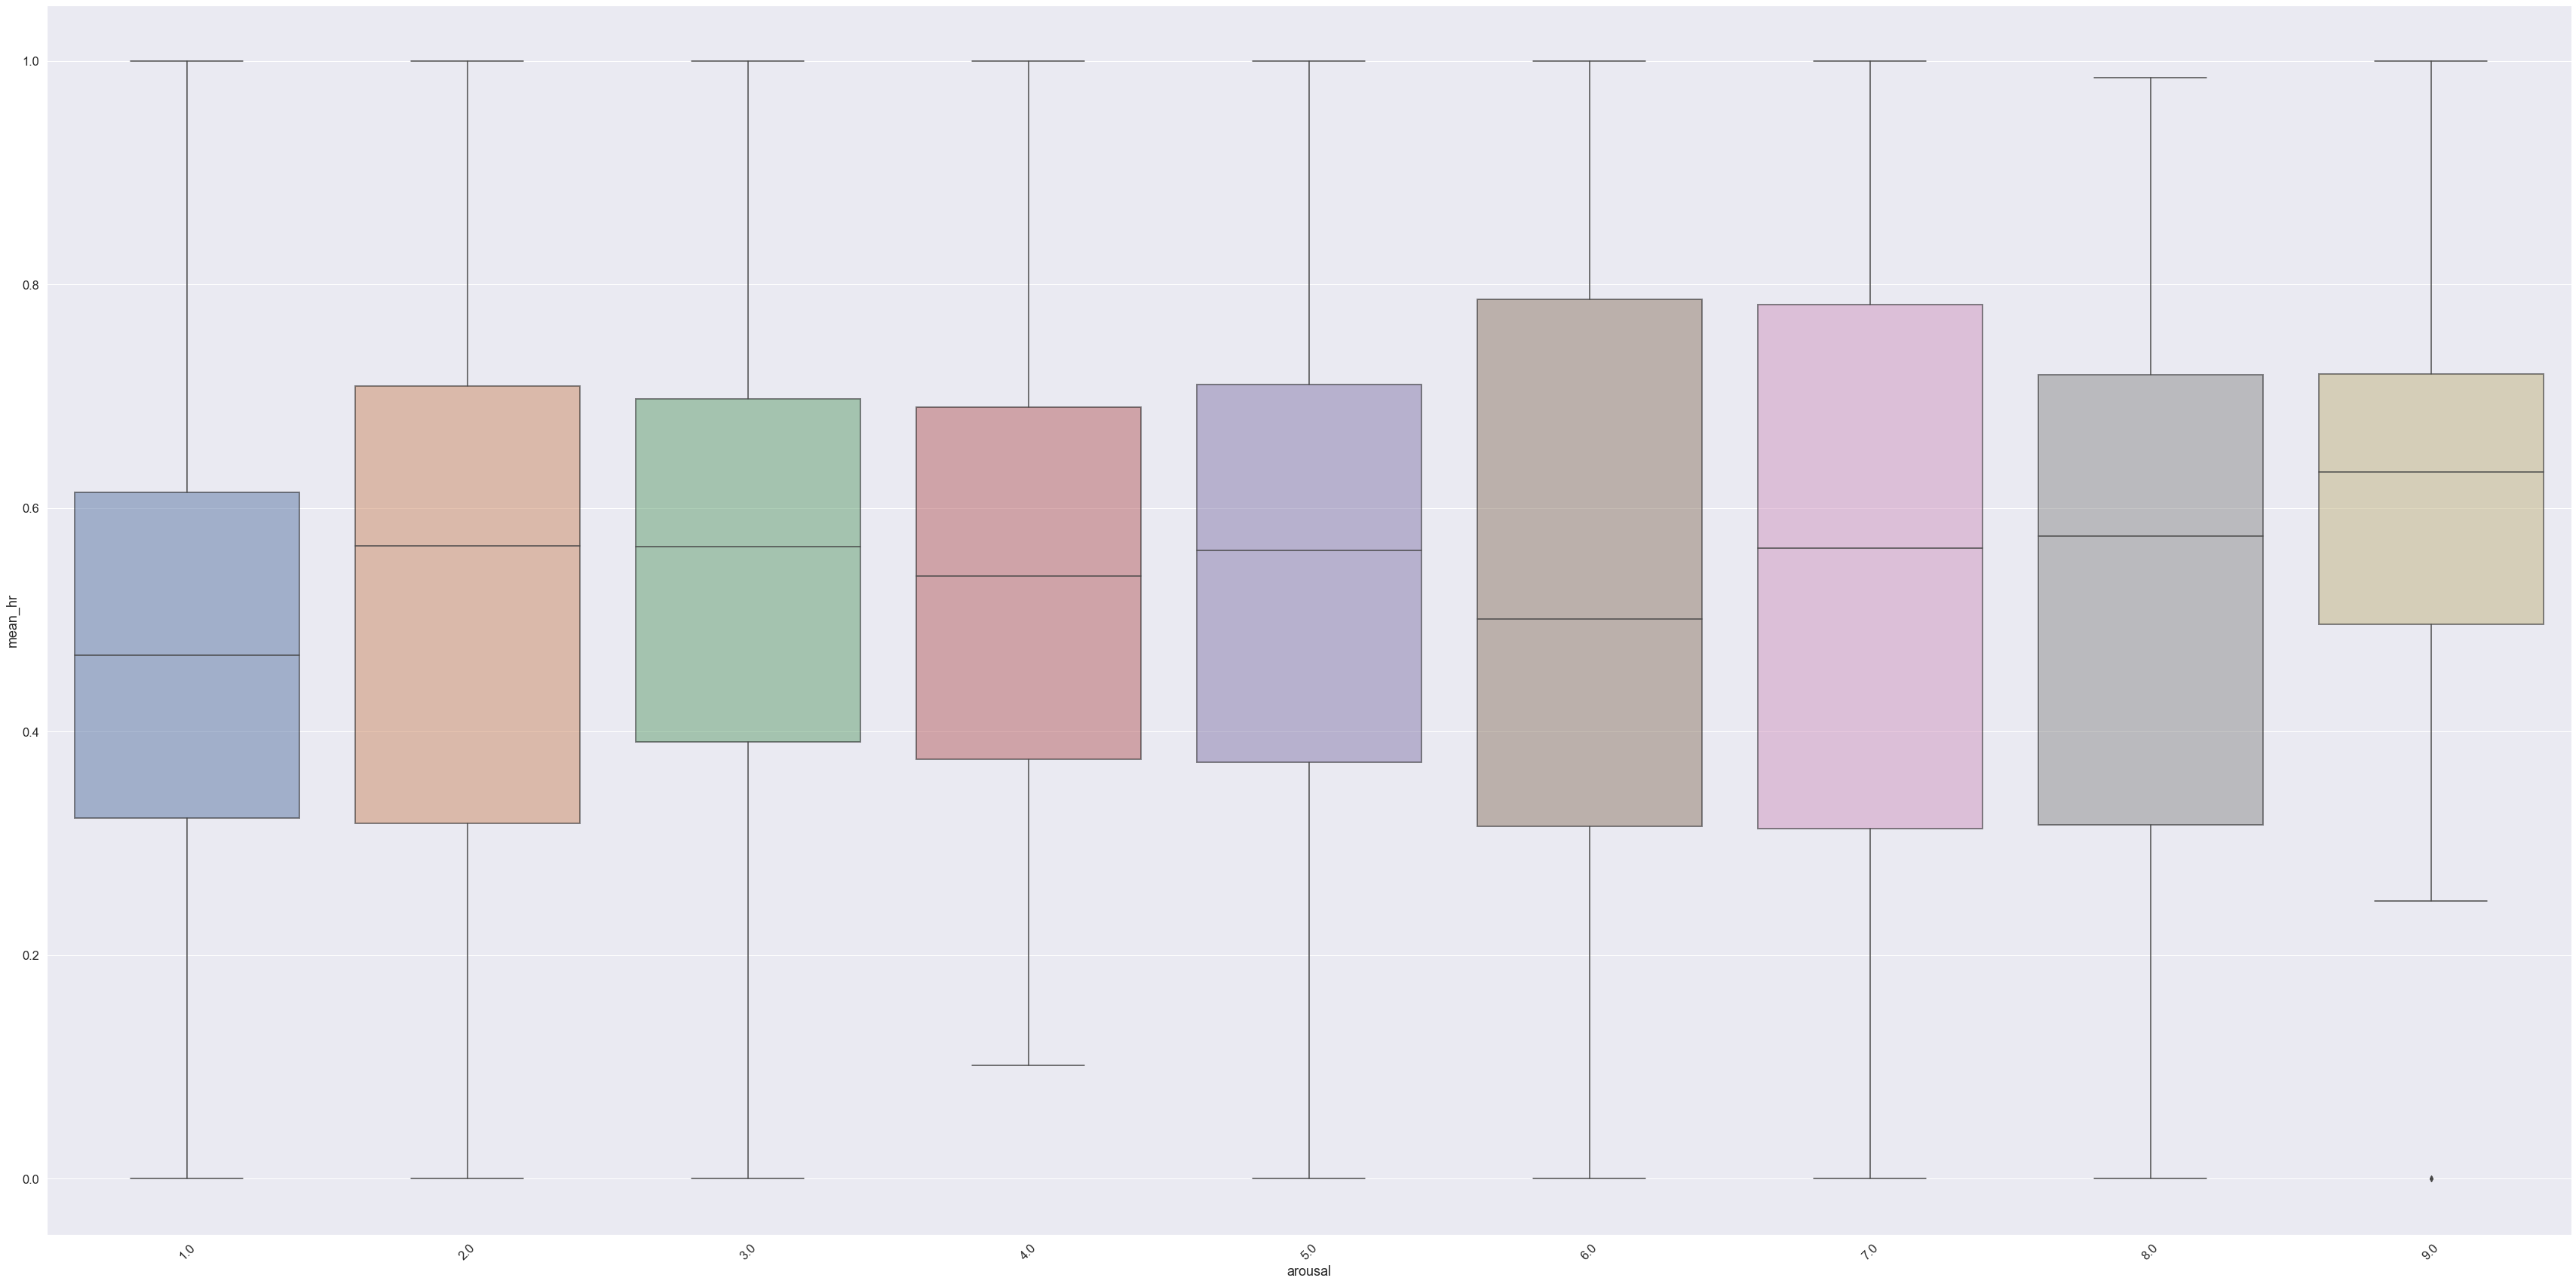

In [297]:
plt.figure(figsize = (60, 30))
ax = sns.boxplot(x='arousal', y='mean_hr', data=train_df_n)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

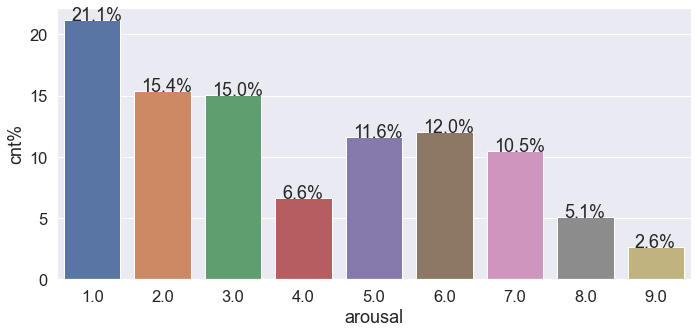

In [298]:
plt.figure(figsize=(25,5))

dual_categories = ['arousal']

plt_cnt = 1;
for feature in dual_categories:
    plt.subplot(1,2,plt_cnt)
    tempdf = get_percentage_cnt(train_df_n, feature)
    myplot(feature, 'cnt%', tempdf)
    plt_cnt += 1

plt.show()

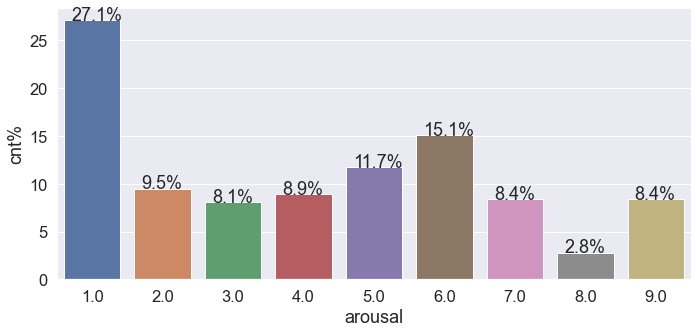

In [299]:
plt.figure(figsize=(25,5))

dual_categories = ['arousal']

plt_cnt = 1;
for feature in dual_categories:
    plt.subplot(1,2,plt_cnt)
    tempdf = get_percentage_cnt(validation_df_n, feature)
    myplot(feature, 'cnt%', tempdf)
    plt_cnt += 1

plt.show()

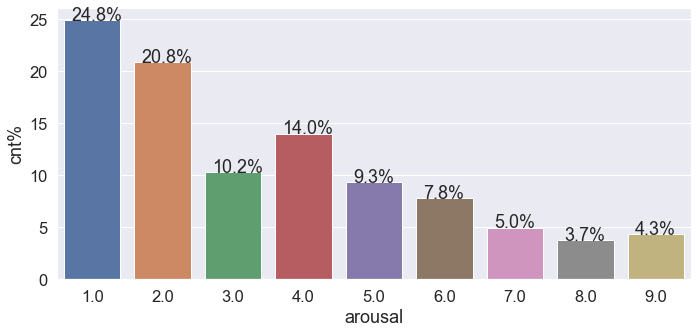

In [300]:
plt.figure(figsize=(25,5))

dual_categories = ['arousal']

plt_cnt = 1;
for feature in dual_categories:
    plt.subplot(1,2,plt_cnt)
    tempdf = get_percentage_cnt(test_df_n, feature)
    myplot(feature, 'cnt%', tempdf)
    plt_cnt += 1

plt.show()

In [301]:
dt_n = DecisionTreeRegressor(random_state=2,max_depth=15,max_features="log2")
dt_n = dt.fit(train_x_n, train_y_n)
dt_y_n=dt.predict(validation_x_n)
print(dt_y_n)
RoundPredictions(dt_y_n)


[4.41843972 4.79393939 4.79393939 3.6472103  3.6472103  3.6472103
 3.6472103  4.79393939 3.6472103  3.6472103  3.6472103  3.6472103
 4.79393939 4.79393939 4.79393939 4.79393939 4.79393939 4.79393939
 3.6472103  3.6472103  4.79393939 4.79393939 3.6472103  4.79393939
 4.79393939 4.79393939 3.6472103  3.6472103  3.6472103  4.79393939
 3.6472103  3.6472103  3.6472103  4.41843972 4.41843972 3.6472103
 4.41843972 4.41843972 3.6472103  3.6472103  4.41843972 3.6472103
 3.6472103  3.6472103  3.6472103  3.6472103  3.6472103  3.6472103
 3.6472103  3.6472103  6.42105263 6.42105263 4.79393939 4.79393939
 3.6472103  3.6472103  3.6472103  3.6472103  3.6472103  4.79393939
 4.79393939 3.6472103  3.6472103  3.6472103  3.6472103  3.6472103
 3.6472103  3.6472103  3.6472103  3.6472103  3.6472103  3.6472103
 3.6472103  3.6472103  3.6472103  6.42105263 3.6472103  3.6472103
 3.6472103  3.6472103  3.6472103  3.6472103  4.79393939 3.6472103
 4.79393939 3.6472103  3.6472103  3.6472103  3.6472103  3.6472103
 3.64

In [302]:
mae9 = mean_absolute_error(validation_y_n, dt_y_n)
mse9 = mean_squared_error(validation_y_n,dt_y_n)
rmse9 = np.sqrt(mean_squared_error(validation_y_n,dt_y_n))
r29 = r2_score(validation_y_n, dt_y_n)
# The mean absolute error
print ("Decision Tree Regressor performance:")
print('- Mean absolute error: %.2f' % mae9)

# The mean squared error
print('- Mean squared error: %.2f' % mse9)

# The Root mean squared error
print('- Root mean squared error: %.2f' % rmse9)

# The coefficient of determination: 1 is perfect prediction
print('- Coefficient of determination (R2 score): %.2f' % r29)

Decision Tree Regressor performance:
- Mean absolute error: 2.49
- Mean squared error: 8.52
- Root mean squared error: 2.92
- Coefficient of determination (R2 score): -0.23


In [303]:
dt_n = dt.fit(train_x_n, train_y_n)
dt_y_n=dt.predict(test_x_n)
RoundPredictions(dt_y_n)
mae10 = mean_absolute_error(test_y_n, dt_y_n)
mse10 = mean_squared_error(test_y_n,dt_y_n)
rmse10 = np.sqrt(mean_squared_error(test_y_n,dt_y_n))
r210 = r2_score(test_y_n, dt_y_n)
# The mean absolute error
print ("Decision Tree Regressor performance:")
print('- Mean absolute error: %.2f' % mae10)

# The mean squared error
print('- Mean squared error: %.2f' % mse10)

# The Root mean squared error
print('- Root mean squared error: %.2f' % rmse10)

# The coefficient of determination: 1 is perfect prediction
print('- Coefficient of determination (R2 score): %.2f' % r210)

Decision Tree Regressor performance:
- Mean absolute error: 2.28
- Mean squared error: 7.91
- Root mean squared error: 2.81
- Coefficient of determination (R2 score): -0.45


c:\Users\Ivona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actual Vs Predicted value')

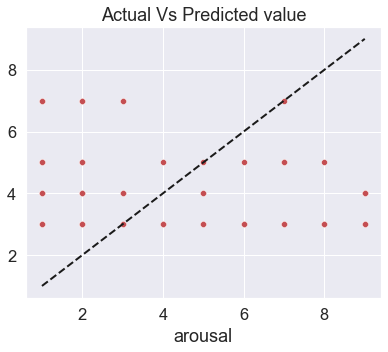

In [313]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(test_y_n,dt_y_n,ax=ax,color='r')
plt.plot([test_y_n.min(), test_y_n.max()], [test_y_n.min(),test_y_n.max()], 'k--', lw=2)
ax.set_title('Actual Vs Predicted value')

In [310]:
rf_n = RandomForestRegressor( random_state=1,n_estimators=350,min_samples_split=2,max_depth=25,max_features="sqrt")
rf_n = rf_n.fit(train_x_n, train_y_n)
rf_y_n=rf_n.predict(validation_x_n)
RoundPredictions(rf_y_n)
mae11 = mean_absolute_error(validation_y_n, rf_y_n)
mse11 = mean_squared_error(validation_y_n,rf_y_n)
rmse11 = np.sqrt(mean_squared_error(validation_y_n,rf_y_n))
r211 = r2_score(validation_y_n, rf_y_n)
# The mean absolute error
print ("Random Fores Regressor performance:")
print('- Mean absolute error: %.2f' % mae11)

# The mean squared error
print('- Mean squared error: %.2f' % mse11)

# The Root mean squared error
print('- Root mean squared error: %.2f' % rmse11)

# The coefficient of determination: 1 is perfect prediction
print('- Coefficient of determination (R2 score): %.2f' % r211)

Random Fores Regressor performance:
- Mean absolute error: 2.59
- Mean squared error: 8.87
- Root mean squared error: 2.98
- Coefficient of determination (R2 score): -0.29


In [311]:
rf_n = RandomForestRegressor( random_state=1,n_estimators=350,min_samples_split=2,max_depth=25,max_features="sqrt")
rf_n = rf_n.fit(train_x_n, train_y_n)
rf_y_n=rf_n.predict(test_x_n)
RoundPredictions(rf_y_n)
mae12 = mean_absolute_error(test_y_n, rf_y_n)
mse12 = mean_squared_error(test_y_n,rf_y_n)
rmse12 = np.sqrt(mean_squared_error(test_y_n,rf_y_n))
r212 = r2_score(test_y_n, rf_y_n)
# The mean absolute error
print ("Random Fores Regressor performance:")
print('- Mean absolute error: %.2f' % mae12)

# The mean squared error
print('- Mean squared error: %.2f' % mse12)

# The Root mean squared error
print('- Root mean squared error: %.2f' % rmse12)

# The coefficient of determination: 1 is perfect prediction
print('- Coefficient of determination (R2 score): %.2f' % r212)

Random Fores Regressor performance:
- Mean absolute error: 2.13
- Mean squared error: 6.87
- Root mean squared error: 2.62
- Coefficient of determination (R2 score): -0.26


c:\Users\Ivona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actual Vs Predicted value')

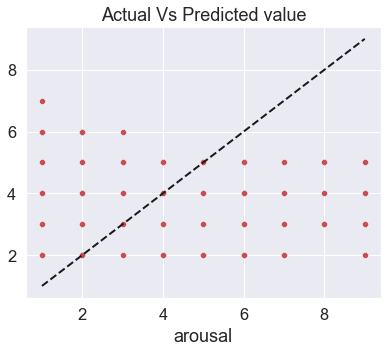

In [312]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(test_y_n,rf_y_n,ax=ax,color='r')
plt.plot([test_y_n.min(), test_y_n.max()], [test_y_n.min(),test_y_n.max()], 'k--', lw=2)
ax.set_title('Actual Vs Predicted value')

In [315]:
svm_n = SVR(kernel='poly',tol=0.1,degree=5)

svm_n.fit(train_x_n, train_y_n)

svm_y_n = svm_n.predict(validation_x_n)
RoundPredictions(svm_y_n)
mae13= mean_absolute_error(validation_y_n, svm_y_n)
mse13 = mean_squared_error(validation_y_n,svm_y_n)
rmse13 = np.sqrt(mean_squared_error(validation_y_n,svm_y_n))
r213 = r2_score(validation_y_n, svm_y_n)
# The mean absolute error
print ("Random Forest Regressor performance:")
print('- Mean absolute error: %.2f' % mae13)

# The mean squared error
print('- Mean squared error: %.2f' % mse13)

# The Root mean squared error
print('- Root mean squared error: %.2f' % rmse13)

# The coefficient of determination: 1 is perfect prediction
print('- Coefficient of determination (R2 score): %.2f' % r213)

Random Forest Regressor performance:
- Mean absolute error: 2.79
- Mean squared error: 12.15
- Root mean squared error: 3.49
- Coefficient of determination (R2 score): -0.76


In [316]:
ada_n = AdaBoostRegressor(n_estimators=150, random_state=3)

ada_n.fit(train_x_n, train_y_n)

ada_y_n = ada_n.predict(validation_x_n)
RoundPredictions(ada_y_n)
mae14= mean_absolute_error(validation_y_n, ada_y_n)
mse14 = mean_squared_error(validation_y_n,ada_y_n)
rmse14 = np.sqrt(mean_squared_error(validation_y_n,ada_y_n))
r214 = r2_score(validation_y_n, ada_y_n)
# The mean absolute error
print ("Random Forest Regressor performance:")
print('- Mean absolute error: %.2f' % mae14)

# The mean squared error
print('- Mean squared error: %.2f' % mse14)

# The Root mean squared error
print('- Root mean squared error: %.2f' % rmse14)

# The coefficient of determination: 1 is perfect prediction
print('- Coefficient of determination (R2 score): %.2f' % r214)

Random Forest Regressor performance:
- Mean absolute error: 2.36
- Mean squared error: 7.44
- Root mean squared error: 2.73
- Coefficient of determination (R2 score): -0.08


In [317]:
ada_n.fit(train_x_n, train_y_n)

ada_y_n = ada_n.predict(test_x_n)
RoundPredictions(ada_y_n)
mae14= mean_absolute_error(test_y_n, ada_y_n)
mse14 = mean_squared_error(test_y_n,ada_y_n)
rmse14 = np.sqrt(mean_squared_error(test_y_n,ada_y_n))
r214 = r2_score(test_y_n, ada_y_n)
# The mean absolute error
print ("Random Forest Regressor performance:")
print('- Mean absolute error: %.2f' % mae14)

# The mean squared error
print('- Mean squared error: %.2f' % mse14)

# The Root mean squared error
print('- Root mean squared error: %.2f' % rmse14)

# The coefficient of determination: 1 is perfect prediction
print('- Coefficient of determination (R2 score): %.2f' % r214)

Random Forest Regressor performance:
- Mean absolute error: 2.17
- Mean squared error: 6.83
- Root mean squared error: 2.61
- Coefficient of determination (R2 score): -0.25


c:\Users\Ivona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actual Vs Predicted value')

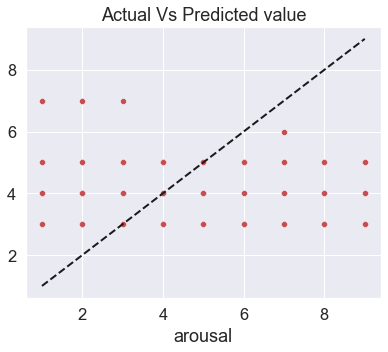

In [318]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(test_y_n,ada_y_n,ax=ax,color='r')
plt.plot([test_y_n.min(), test_y_n.max()], [test_y_n.min(),test_y_n.max()], 'k--', lw=2)
ax.set_title('Actual Vs Predicted value')

In [319]:
data = {'Metric':  ['MAE', 'MSE','RMSE','R2'],
        'DT(no norm.)': [mae2,mse2,rmse2,r22],
        'AB(base. norm.)': [mae7,mse7,rmse7,r27],
        'AB(minmax norm.)': [mae14,mse14,rmse14,r214]
        }

comparison = pd.DataFrame (data, columns = ['Metric','DT(no norm.)', 'AB(base. norm.)', 'AB(minmax norm.)'])
comparison

,Metric,DT(no norm.),AB(base. norm.),AB(minmax norm.)
0,MAE,2.056487,1.944099,2.170807
1,MSE,5.783914,5.478261,6.829193
2,RMSE,2.404977,2.340568,2.613272
3,R2,-0.060302,-0.004270,-0.251921
